In [2]:
import pandas as pd

In [145]:
import pickle

In [4]:
with open("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/integrated_network.pickle","rb") as file:
    network = pickle.load(file)

In [11]:
with open("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/integrated_df.pickle","wb") as file:
    pickle.dump(df,file)

In [8]:
df = pd.DataFrame.from_dict(dict(network.nodes(data=True)), orient='index') 

In [3]:
plastchem =  pd.read_csv("/lustre/BIF/nobackup/hendr218/Databases/PlastChem_db.tsv", sep='\t', encoding='windows-1251', low_memory=False, header=1)

In [14]:
test = plastchem["inchi"][plastchem["inchi"].notna()]

In [15]:
test.to_csv("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/plastchem_inchi_commasep.csv",header=False,index=False,sep=",")

In [20]:
test = plastchem["molecular_formula"][plastchem["molecular_formula"].notna()]

In [6]:
test = plastchem["canonical_smiles"][plastchem["canonical_smiles"].notna()]

In [7]:
test.to_csv("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/plastchem_smiles.csv",header=False,index=False)

In [7]:
test.to_csv("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/plastchem_smiles_commasep.csv",header=False,index=False,sep=",")

In [14]:
quantt =  pd.read_csv("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/V2_test1_pos/mzmine/mzmine_iimn_fbmn_quant_full.csv"

/tmp/ipykernel_1888483/4075655971.py:1: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  quantt =  pd.read_csv("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/V2_test1_pos/mzmine/mzmine_iimn_fbmn_quant_full.csv")


In [16]:
quantt[]


id     area       rt  mz_range:min  mz_range:max  charge  \
0         2  27710.0   2.1605     235.02625     235.02650     NaN   
1         4  41040.0   2.1043     195.12265     195.12273     NaN   
2         5  56850.0   2.2190     135.10148     135.10164     NaN   
3         6  10420.0   2.1508     322.10726     322.10756     NaN   
4         7  26090.0   2.1750     152.12809     152.12818     NaN   
...     ...      ...      ...           ...           ...     ...   
8744  44036   7115.0  35.9304     619.45249     619.45286     NaN   
8745  44037   9096.0  35.9239     590.43134     590.43149     NaN   
8746  44039  17850.0  35.9092     665.49762     665.49995     NaN   
8747  44040  14150.0  35.9248     694.52010     694.52295     NaN   
8748  44041  11600.0  35.9859     695.02197     695.02291     NaN   

      fragment_scans  alignment_scores:rate  \
0                  5                  0.045   
1                  4                  0.045   
2                 36                  0.409   
3                  2                  0.091   
4                 10                  0.227   
...              ...                    ...   
8744               2                  0.091   
8745               3                  0.091   
8746               3                  0.045   
8747               6                  0.091   
8748               1                  0.045   

      alignment_scores:aligned_features_n  \
0                                       1   
1                                       1   
2                                       9   
3                                       2   
4                                       5   
...                                   ...   
8744                                    2   
8745                                    2   
8746                                    1   
8747                                    2   
8748                                    1   

      alignment_scores:align_extra_features  ...  \
0                                         1  ...   
1                                         0  ...   
2                                         1  ...   
3                                         0  ...   
4                                         0  ...   
...                                     ...  ...   
8744                                      2  ...   
8745                                      0  ...   
8746                                      4  ...   
8747                                      5  ...   
8748                                      3  ...   

      datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos03.mzML:mz  \
0                                                   NaN           
1                                             195.12275           
2                                             135.10156           
3                                                   NaN           
4                                             152.12795           
...                                                 ...           
8744                                          619.44667           
8745                                          590.43047           
8746                                          665.50009           
8747                                          694.52070           
8748                                                NaN           

      datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos03.mzML:intensity_range:min  \
0                                                   NaN                            
1                                                3270.0                            
2                                                 940.4                            
3                                                   NaN                            
4                                                 931.1                            
...                                                 ...                            
8744                                              850.3 

In [47]:
samples = [key for key in quantt.keys() if ("mzML:area" in key) & (not "Blank" in key)]
blanks = [key for key in quantt.keys() if ("mzML:area" in key) & ("Blank" in key)]

In [54]:
sample_areas = quantt.loc[:,samples].transpose()
blank_areas =quantt.loc[:,blanks].transpose()

In [89]:
sample_means = sample_areas.mean().to_frame()
blank_means = blank_areas.mean().to_frame()

In [88]:
blank_means["sample_means"] = sample_means 

In [90]:
blank_means["sample_means"] = sample_areas.mean()

In [93]:
means = blank_means.rename(columns={0:"blank_means"})

In [96]:
means = means.fillna(0)

In [107]:
means_checked = means["blank_means"] < 0.3*means["sample_means"]

In [111]:
means_checked.to_dict()

{0: True,
 1: True,
 2: True,
 3: True,
 4: True,
 5: True,
 6: True,
 7: True,
 8: True,
 9: True,
 10: True,
 11: True,
 12: True,
 13: True,
 14: True,
 15: True,
 16: True,
 17: False,
 18: True,
 19: False,
 20: True,
 21: True,
 22: True,
 23: False,
 24: True,
 25: True,
 26: True,
 27: True,
 28: True,
 29: True,
 30: True,
 31: True,
 32: True,
 33: True,
 34: True,
 35: False,
 36: True,
 37: False,
 38: True,
 39: True,
 40: True,
 41: True,
 42: True,
 43: False,
 44: True,
 45: True,
 46: True,
 47: True,
 48: True,
 49: True,
 50: True,
 51: True,
 52: True,
 53: True,
 54: True,
 55: True,
 56: True,
 57: True,
 58: True,
 59: True,
 60: True,
 61: True,
 62: True,
 63: True,
 64: True,
 65: True,
 66: True,
 67: True,
 68: True,
 69: True,
 70: True,
 71: True,
 72: True,
 73: True,
 74: True,
 75: True,
 76: True,
 77: True,
 78: True,
 79: True,
 80: True,
 81: True,
 82: True,
 83: True,
 84: True,
 85: True,
 86: True,
 87: True,
 88: True,
 89: True,
 90: True,
 91

In [163]:
test2 = sample_areas.transpose()


In [164]:
test2["mean"] = test2.mean(axis=1)

In [165]:
test2_sample = [key for key in test2.keys() if "PE_PET_PC" in key]

In [169]:
test2 = test2.transpose().fillna(0)

In [170]:
test2

0     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  27710.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  10830.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   8323.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...    471.600000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...    437.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...    272.800000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  10380.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...   8088.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...   5706.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...   2725.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...   3282.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...    925.100000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...      0.000000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...     28.450000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...     26.130000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02...      0.000000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03...     33.840000   
mean                                                 5282.594667   

                                                            1     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  41040.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...    413.800000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   1163.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...   1915.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...    720.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...    745.400000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...   1033.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...   1086.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...    533.800000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...   1665.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...   1076.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...    704.100000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...    780.600000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...    423.400000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...    308.600000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02...    515.700000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03...    707.600000   
mean                                                 3225.352941   

                                                            2     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  56850.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  31580.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  33570.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...   7852.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...   9935.000000   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...   4112.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  24530.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  25220.000000   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  25380.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  13140.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  12840.000000   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  12780.000000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...    170.400000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...    204.300000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...    385.200000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02...    242.700000   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03...    163.900000   
mean                                                15232.676471   

                                                            3     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   1426.000000   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC

In [ ]:
for id in test2.keys():
    mean = test2[id].mean()
    test3[id] = test3[id].map(lambda x: True if mean < 0.3 * x else False)
    # test[test["mean"] < 0.3*test.loc[:,test_sample].mean(axis=1)]
    # lambda x: True if x > mean else False




In [175]:
test3 = test2

In [177]:
test3

0      1      2     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   True   True   True   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03...  False  False  False   
mean                                                False  False  False   

                                                     3      4      5     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False   True  False   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   True  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...   True  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False   True   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False   True   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False   True   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03...  False  False  False   
mean                                                False  False  False   

                                                     6      7      8     \
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False  False   True   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False   True  False   
datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_p...  False   True  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_po...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_p...  False  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...   True  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos0...   True  False  False   
datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01...  False  False  False   
d

In [210]:
test4 = {}
for id, files in test3.to_dict().items():
    test4[id] = ""
    for file,val in files.items(): 
        if (val) & (not file in test4[id]):
            test4[id] += file[:-5]

In [211]:
test4

{0: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 1: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 2: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 3: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos03.mzML',
 4: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 5: 'datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos01.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos03.mzML',
 6: 'datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos03.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03.mzML',
 7: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos03.mzML',
 8: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 9: 'datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_po

In [202]:
test3.to_dict().keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [188]:
test3_dict

{'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML:area': {0: True,
  1: True,
  2: True,
  3: False,
  4: True,
  5: False,
  6: False,
  7: False,
  8: True,
  9: False,
  10: False,
  11: False,
  12: False,
  13: False,
  14: True,
  15: False,
  16: False,
  17: False,
  18: False,
  19: False,
  20: False,
  21: False,
  22: False,
  23: True,
  24: False,
  25: False,
  26: False,
  27: True,
  28: False,
  29: True,
  30: False,
  31: False,
  32: False,
  33: False,
  34: False,
  35: False,
  36: False,
  37: True,
  38: False,
  39: False,
  40: False,
  41: True,
  42: True,
  43: True,
  44: True,
  45: False,
  46: False,
  47: False,
  48: False,
  49: False,
  50: False,
  51: False,
  52: False,
  53: False,
  54: False,
  55: False,
  56: False,
  57: False,
  58: False,
  59: False,
  60: False,
  61: False,
  62: False,
  63: False,
  64: False,
  65: False,
  66: False,
  67: False,
  68: False,
  69: False,
  70: False,
  71: False,
  72: False,
  73: Fals

In [143]:
test[test["mean"] < 0.3*test.loc[:,test_sample].mean(axis=1)]

datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML:area  \
1                                              41040.00               
7                                                798.80               
22                                                46.73               
23                                            171000.00               
24                                            218100.00               
...                                                 ...               
8740                                             477.80               
8744                                            4892.00               
8746                                           11670.00               
8747                                            8293.00               
8748                                            2548.00               

      datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzML:area  \
1                                                 413.8               
7                                               23010.0               
22                                              13420.0               
23                                               1379.0               
24                                             828700.0               
...                                                 ...               
8740                                             7390.0               
8744                                             7115.0               
8746                                            17850.0               
8747                                             9850.0               
8748                                             8210.0               

      datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos03.mzML:area  \
1                                                1163.0               
7                                               22810.0               
22                                              13760.0               
23                                                602.0               
24                                             812700.0               
...                                                 ...               
8740                                             8715.0               
8744                                             3760.0               
8746                                            17050.0               
8747                                            14150.0               
8748                                            11600.0               

      datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_pos01.mzML:area  \
1                                                1915.0                
7                                                1004.0                
22                                                104.8                
23                                               4900.0                
24                                              29110.0                
...                                                 ...                
8740                                             1769.0                
8744                                             1158.0                
8746                                             6348.0                
8747                                             2664.0                
8748                                             1525.0                

      datafile:FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_pos02.mzML:area  \
1                                                720.00                
7                                                470.10                
22                                                88.92                
23                                              4100.00                
24                                             28910.00                
...                                                 ...                
8740                                            1499.00                
8744  

In [160]:
means_copy = test

In [161]:
means_copy

['FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_proc_Blank_pos01.mzML',
 'FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_pos01.mzML',
 'FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_proc_Blank_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02.mzML',
 'FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 'FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_pos01.mzML',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01.mzML',
 'FS-120k-ddMS2_HCD_20-50_proc_Blank_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_02_PE_PET_Dec_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_04_PE_PA_Dec_pos03.mzML',
 'FS-120k-ddMS2_HCD_20-50_Blank_pos04.mzML',
 'FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos

In [153]:
with open("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/V2_test1_pos/full_network_df.pickle","rb") as file:
    dataframe = pickle.load(file)

In [ ]:
"""takes input mgf,df and adds metadata"""
with open("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/V2_test1_pos/mzmine/mzmine_sirius.mgf") as file:
    A = file.read()
    entries = A.split("BEGIN IONS")[1:]

id_files_dict = {}
for entry in entries:
    feature_id = entry.split('\n')[1][11:] 
    if "FILENAME" in entry:
        files = entry.split("FILENAME")[1][1:].split('\n')[0]
        id_files_dict[feature_id] = files.split(";")

metadata_dict = {}
with open("/lustre/BIF/nobackup/hendr218/Data/testrun_06_02/input/metadata_pos_17-02.csv") as file:
    for line in file.readlines()[1:]:
        name,plastic_type,plastic_state = line.split(',')
        plastic_state=plastic_state[:-1]
        polarity = "pos" if "pos" in name else "neg"
        if plastic_state == "Blank":
            state_type = "blank"
        elif plastic_state == "procBlank":
            state_type = "proc_blank"
        else:
            state_type = f"{plastic_type}_{plastic_state}"
        if not name in metadata_dict:
            metadata_dict[name] = state_type
        


id_statetype = {}
test = id_files_dict["4"]
for id, files in id_files_dict.items():
    id_statetype[id] = ""
    for file in files: 
        statetype = metadata_dict[file]
        if not statetype in id_statetype[id]:
            id_statetype[id] += f"{statetype}, "

#  for i in id_statetype["id"].unique():
dataframe["all_metadata"] = dataframe.index.map(lambda x: id_statetype.get(x,"N/A"))
for metadata_type in ["PE_PA_Dec", "PE_PA_PC","PE_Dec", "PE_PC", "PE_PET_PC", "PE_PET_Dec","blank","PE_PA","PE_PET"]:
    dataframe[metadata_type] = dataframe["all_metadata"].str.contains(metadata_type)
dataframe["PE"] = dataframe["all_metadata"].map(lambda x: True if ("PE_Dec" in x or "PE_PC" in x) else False)



In [212]:
dataframe["all_metadata"] = dataframe.index.map(lambda x: test4.get(x,"N/A"))
for metadata_type in ["PE_PA_Dec", "PE_PA_PC","PE_Dec", "PE_PC", "PE_PET_PC", "PE_PET_Dec","blank","PE_PA","PE_PET"]:
    dataframe[metadata_type] = dataframe["all_metadata"].str.contains(metadata_type)
dataframe["PE"] = dataframe["all_metadata"].map(lambda x: True if ("PE_Dec" in x or "PE_PC" in x) else False)

In [224]:
test4

{0: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 1: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 2: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 3: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos03.mzML',
 4: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 5: 'datafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos01.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_03_PE_PA_PC_pos03.mzML',
 6: 'datafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos03.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03.mzML',
 7: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos02.mzMLdatafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos03.mzML',
 8: 'datafile:FS-120k-ddMS2_HCD_20-50_01_PE_PET_PC_pos01.mzML',
 9: 'datafile:FS-120k-ddMS2_HCD_20-50_05_PE_PC_po

In [223]:
dataframe.loc[["1"],:]

KeyError: "None of [Index(['1'], dtype='object')] are in the [index]"

In [159]:
id_statetype

{'4': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '5': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '6': 'PE_PA_Dec, PE_PA_PC, PE_PET_PC, PE_PET_Dec, ',
 '7': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '8': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '10': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PC, PE_PET_Dec, PE_PA_PC, PE_PET_PC, ',
 '11': 'PE_PA_Dec, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_Dec, PE_PC, ',
 '12': 'PE_PA_Dec, PE_Dec, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, proc_blank, ',
 '13': 'PE_PA_Dec, PE_Dec, PE_PA_PC, PE_PET_Dec, PE_PC, PE_PET_PC, ',
 '15': 'PE_PA_Dec, PE_PA_PC, PE_PET_PC, PE_PET_Dec, ',
 '17': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '18': 'PE_PA_Dec, PE_Dec, proc_blank, PE_PA_PC, PE_PET_PC, PE_PET_Dec, PE_PC, ',
 '19': 'PE_PA_Dec, PE_Dec, PE_PA_PC, PE_PET_Dec, PE_PC, PE_PET_PC, blank, ',
 '21': 'PE_PA_Dec, PE_

In [158]:
metadata_dict


{'FS-120k-ddMS2_HCD_20-50_Blank_pos01.mzML': 'blank',
 'FS-120k-ddMS2_HCD_40-100_Blank_neg01.mzML': 'blank',
 'FS-120k-ddMS2_HCD_40-100_Blank_neg02.mzML': 'blank',
 'FS-120k-ddMS2_HCD_20-50_Blank_pos03.mzML': 'blank',
 'FS-120k-ddMS2_HCD_20-50_Blank_pos04.mzML': 'blank',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_neg01.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos01.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_neg01.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos01.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_neg02.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos02.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_neg02.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos02.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_neg03.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_Dec_pos03.mzML': 'PE_Dec',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_neg03.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_05_PE_PC_pos03.mzML': 'PE_PC',
 'FS-120k-ddMS2_HCD_20-50_03_PE_

In [526]:
quant_table =  pd.read_csv("/lustre/BIF/nobackup/hendr218/Data/plastchem_as_sirius_db/all/mzmine/mzmine_iimn_fbmn_quant_full.csv",low_memory=False)
samples = [key for key in quant_table.keys() if ("mzML:area" in key) & (not "Blank" in key)]
samples.append('id')
blanks = [key for key in quant_table.keys() if ("mzML:area" in key) & ("Blank" in key)]
blanks.append('id')
s_areas = quant_table.loc[:,samples].set_index('id').transpose()
b_areas =quant_table.loc[:,blanks].set_index('id').transpose()

s_area_tresholded = s_areas
for id in s_areas.keys():
    mean = s_areas[id].mean()
    s_area_tresholded[id] = s_areas[id].map(lambda x: True if mean < 0.3 * x else False)

test4 = {}
for id, files in s_area_tresholded.to_dict().items():
    id = str(id)
    test4[id] = ""
    for file,val in files.items(): 
        pass
        if (val) & (not file in test4[id]):
            test4[id] += f"{file[:-5]}, "

In [533]:
b_areas = quant_table.loc[:,blanks].set_index('id').transpose().fillna(0)

In [549]:
test1 = quant_table.loc[:,samples].set_index('id').transpose().fillna(0).mean()

In [559]:
test2 = quant_table.loc[:,blanks].set_index('id').transpose().fillna(0).max()

In [561]:
test1[test1 > 10*test2]

id
2         4661.112941
5        15232.676471
6         2033.882941
7         6418.349412
8         6056.771765
             ...     
44036     1097.099412
44037     1141.378235
44039     3821.358235
44040     2803.151765
44041     1891.304118
Length: 7573, dtype: float64

In [537]:
b_areas

id                                                  2      4      5      \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...    0.0  161.9  43.48   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...    0.0  515.1  54.71   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  253.5  74.54   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  182.8  90.13   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  271.2  54.26   

id                                                  6       7      8      \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...    0.0  28.720  13.61   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...    0.0   0.000  14.37   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  18.060  17.27   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  15.050  15.03   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0   9.238  18.27   

id                                                  10     11     12     \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...  18.20    0.0  20.40   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...  16.40    0.0   0.00   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  16.41    0.0   0.00   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...   0.00    0.0  18.57   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...   0.00    0.0  13.74   

id                                                  13     ...  44024  44026  \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...    0.0  ...  23.83  25.78   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...    0.0  ...   0.00   0.00   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  ...  29.48  18.55   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  ...   0.00  14.97   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...    0.0  ...  20.17  18.83   

id                                                  44029     44030   44031  \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...  214.1   46990.0  280.30   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...  242.8   41150.0   55.93   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  256.3    6351.0   95.59   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  140.2  148100.0   33.48   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  304.3   18460.0   19.57   

id                                                   44036  44037  44039  \
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...  39.700  68.41  45.56   
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...  22.370   0.00   0.00   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  17.940  22.92  35.47   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...   0.000  12.40  12.95   
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...   7.878  20.81  11.93   

id                                                  44040   44041  
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos01.mz...  26.44  28.860  
datafile:FS-120k-ddMS2_HCD_20-50_Blank_pos04.mz...  13.37  10.990  
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  27.35  14.860  
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...   0.00   9.732  
datafile:FS-120k-ddMS2_HCD_20-50_proc_Blank_pos...  12.43   0.000  

[5 rows x 8749 columns]

In [ ]:
quant_table =  pd.read_csv("/lustre/BIF/nobackup/hendr218/Data/plastchem_as_sirius_db/all/mzmine/mzmine_iimn_fbmn_quant_full.csv",low_memory=False)
samples = [key for key in quant_table.keys() if ("mzML:area" in key) & (not "Blank" in key)]
samples.append('id')
blanks = [key for key in quant_table.keys() if ("mzML:area" in key) & ("Blank" in key)]
blanks.append('id')
s_areas = quant_table.loc[:,samples].set_index('id').transpose()
b_areas =quant_table.loc[:,blanks].set_index('id').transpose()

s_area_tresholded = s_areas
for id in s_areas.keys():
    mean = s_areas[id].mean()
    blank_mean = b_areas[id].mean()


test5= {}
for id, files in s_area_tresholded.to_dict().items():
    id = str(id)
    test5[id] = ""
    for file,val in files.items(): 
        pass
        if (val) & (not file in test5[id]):
            test4[id] += f"{file[:-5]}, "

In [493]:
test = pd.DataFrame(index=s_area_tresholded.keys())

In [471]:
test

is_blank
id             
2             0
4             1
5             2
6             3
7             4
...         ...
44036      8744
44037      8745
44039      8746
44040      8747
44041      8748

[8749 rows x 1 columns]

In [494]:
test["is_blank"] = range(len(test))

In [ ]:
test.loc[len(test)] = pd.Series(dtype='float64')

In [497]:
blank_mean

28.86

In [ ]:
for id in s_areas.keys():
    mean = quant_table.loc[:,samples].set_index('id').transpose().fillna(0).mean()
    blank_max = quant_table.loc[:,blanks].set_index('id').transpose().fillna(0).max()
test["is_blank"] = test.index.map(lambda x: False if mean > 0.3*blank_max else True)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/lustre/BIF/nobackup/hendr218/miniforge3/envs/workflow_V5/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1888483/2894615259.py", line 2, in <module>
    mean = quant_table.loc[:,samples].set_index('id').transpose().mean()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lustre/BIF/nobackup/hendr218/miniforge3/envs/workflow_V5/lib/python3.11/site-packages/pandas/core/frame.py", line None, in set_index
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/lustre/BIF/nobackup/hendr218/miniforge3/envs/workflow_V5/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lustre/BIF/nobackup/hendr218/m

In [511]:
b_areas = b_areas.fillna(0)

In [515]:
b_areas[4].mean()

276.9

In [518]:
test[test["is_blank"] == True]

Empty DataFrame
Columns: [is_blank]
Index: []

In [ ]:
test["is_blank"] = test.index.map(lambda x: )

Empty DataFrame
Columns: []
Index: [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 74, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 113, 115, 116, 118, 121, 123, 124, 125, 126, 127, ...]

[8749 rows x 0 columns]

In [399]:
dataframe["all_metadata"] = dataframe.index.map(lambda x: test5.get(x,"N/A"))
for metadata_type in ["PE_PA_Dec", "PE_PA_PC","PE_Dec", "PE_PC", "PE_PET_PC", "PE_PET_Dec","blank","PE_PA","PE_PET"]:
    dataframe[metadata_type] = dataframe["all_metadata"].str.contains(metadata_type)
dataframe["PE"] = dataframe["all_metadata"].map(lambda x: True if ("PE_Dec" in x or "PE_PC" in x) else False)

In [ ]:
ndataframe.index

Index(['9984', '1439', '41251', '10144', '1071', '33124', '10409', '37225',
       '36999', '16536',
       ...
       '40546', '16594', '2370', '141', '40210', '43912', '21163', '9975',
       '4502', '38930'],
      dtype='object', length=6429)

In [2]:
import pickle

In [4]:
class WorkflowRunner():
    '''Holds the full workflow

    Used to  use the workflow for a specific combination of parameters and settings. 

    Parameters
    ----------
    settings : str | dict
        fn of settings file or dict in json format
        should contain settings defined in workflowsettings required settings class property     

    Attributes
    ----------
    available_tools : list
        Defines which tools can be run. runtool should also be set True in settings file to actually run the tool.
    available_integrations : list
        Defines which integrations can be selected. Integrate_tool should also be set True in settings file to actually integrate the tool.

    '''
    
    available_tools: list[str] = ["mzmine","ms2lda","sirius","toxtree","classyfire", "matchms"]
    available_integrations: list[str] = ["mzmine","ms2lda","sirius","toxtree","classyfire", "matchms","plastchemdb","sirius_db"]

    def __init__(self,settings_json: str | dict) -> None:
        self.settings: WorkflowSettings = WorkflowSettings(settings_json,available_tools=WorkflowRunner.available_tools,available_integrations=WorkflowRunner.available_integrations)
        self.name = self.settings.name
        self.output_folder = self.settings.output_folder
        self.graph: nx.Graph = nx.Graph
        self.network_df, self.network_edgelist = pd.DataFrame,nx.edgelist

    def get_internal_settings(self,settings_json: str | dict) -> dict:
        """Check if internal settings were provided and return them as a json dict
        
        Parameters
        ----------
        settings_json : str | dict
            fn of settings file or settings dict in json format

        Returns
        -------
        Settings dict in json format
        """
        try:
            fn = json_from_string_or_file(settings_json)["paths"].get("internal_settings")
        except KeyError:
            print("settings file must contain 'internal_setting' path in paths")
        return json.load(fn)
    
    def run_all(self) -> None:
        self.run_and_integrate_per_depth()
        print("Sucesfully ran and integrated all tools")

    def get_depths(self,tools: Iterable,goal:str) -> dict[Any,str]:
        """"""
        depths: dict = {}
        for tool in tools:
            config = self.settings.config.get(tool,{})
            goal_depth = config.get(goal,{}).get("depth")
            depth = goal_depth if goal_depth else config.get("depth","N/A")
            match depth:
                case  "1" | 1:
                    depths[tool] = 1
                case  "2" | 2:
                    depths[tool] = 2
                case  "3" | 3:
                    depths[tool] = 3
                case  "4" | 4:
                    depths[tool] = 4
                case  "N/A":
                    depths[tool] = "N/A"
        return depths

    def run_and_integrate_per_depth(self) -> None:
        """For every depth in ascending order, run and integrate tools that are of that depth, finally produce the integrated network graphml file.

        Every tool should have a depth for running and integration specified in internal settings. For every depth, first the tools will be ran, then integrated. 
        This is only attempted for tools that were selected in class property `available tools` or `available integrations`. 
        As the first thing on depth 3, the graph is made so any tools requiring the graph should be of depth 3+.
        As the first thing on depth 4, the network is made so any tools requiring the network should be of depth 4+.

        """

        running_depths: dict[Any,str] = self.get_depths(self.settings.to_run,goal="running")
        integration_depths: dict[Any,str] = self.get_depths(self.settings.to_integrate,goal="integration")
        for current_depth in [1,2,3,4,"N/A"]:
            running: set[Any] = {tool for tool,depth in running_depths.items() if depth==current_depth}
            integrating: set[Any] = {tool for tool,depth in integration_depths.items() if depth==current_depth}               
            if current_depth == 3:
                self.graph = nx.read_graphml(self.settings.paths.get("base_network"))
            if current_depth == 4:   
                self.network_df, self.network_edgelist = network_to_edgelist_and_nodes_df(self.graph)
                self.integration_col = "smiles"  
                #Temporary solution: needs consensus column for smiles/inchis
                self.network_df["smiles"] = self.network_df.apply(self.get_consensus_smiles,axis=1)
                self.network_df["Molecular formula"] = self.network_df.apply(self.get_consensus_formula,axis=1)
            for tool in running:
                self.run_tool(tool)
            for integration in integrating:
                self.integrate_tool(integration)
       # target_df[target_df["Molecular formula"].notna()].merge(source_df[source_df["molecular_formula"].notna()],left_on="Molecular formula",right_on="molecular_formula")
        self.produce_integrated_graphml()

    def get_consensus_formula(self,row):
        """Get formula from database sirius formula if exists, otherwise normal formula"""
        # if row["library_smiles"]
        if not row.get("sirius:molecularFormula"): 
            row["sirius:molecularFormula"] = "N/A"
        if row.get("sirius_db:molecularFormula"):
            return row["sirius_db:molecularFormula"] if isinstance(row["sirius_db:molecularFormula"],str) else row["sirius:molecularFormula"]
        else:
            return row["sirius:molecularFormula"] 
        
    def get_consensus_smiles(self,row):
        """Get smiles from database sirius smiles if exists, otherwise normal smiles"""
        # if row["library_smiles"]
        if not row.get("csifingerid:smiles"): 
            row["csifingerid:smiles"] = "N/A"
        if row.get("sirius_db:molecularFormula"):
            return row["csifingerid_db:smiles"] if isinstance(row["csifingerid_db:smiles"],str) else row["csifingerid:smiles"]
        else:
            return row["csifingerid:smiles"] 
        

    def produce_integrated_graphml(self) -> None:
        """Cleans, filters and creates graphml from network DF and edges
        
        Topology filter is always used: cluster can be only of 100 nodes. 
        Converts all missing values to "N/A" and turns all properties into strings for easier reading in cytoscape!
        """
        integrated_df: pd.DataFrame = self.network_df
        integrated_network = nx.from_pandas_edgelist(self.network_edgelist,edge_attr=True)
        integrated_df_as_strings = integrated_df.astype(str)
        integrated_df_cleaned = integrated_df_as_strings.map(convert_missing)
        nodes_dict = integrated_df_cleaned.to_dict(orient='index')
        for node_ID in nodes_dict:
            if not node_ID in integrated_network:
                integrated_network.add_node(node_ID)
            #nodes_dict[node_ID] = {}
            for attribute in nodes_dict[node_ID]:
                integrated_network.nodes[node_ID][attribute] = nodes_dict[node_ID][attribute]
        filter_component(integrated_network,100)
        nx.write_graphml(integrated_network, f"{self.output_folder}/{self.name}.graphml")

    def run_tool(self,tool: Any) -> None:
        """Get running parameters and run selected tool
        
        Here, all running behavirous for a specific tool is defined. First the required parameters are obtained from properties that were set & checked in `WorkflowSettings`.
        Simple format converions of input are done here as well.  
        No order is defined here: use depth in internal settings for that.
        Will only do something for tools defined in `available_tools` class property.

        """
        match tool:
            case "classyfire":
                #print('ran classyfire (not, debug)')
                input_csv = self.create_smiles_csv_from_df(output_name = f"{self.output_folder}/classyfire_input.csv",header=False)
                output_path = self.settings.paths.get("classyfire_output")
                print('running classyfire')
                run_classyfire(input_path=input_csv,output_path=output_path)
                # parse_classyfire_sdf("/lustre/BIF/nobackup/hendr218/temp/sdftest.txt")
            case "matchms":
                print("running matchms")
                graph: nx.Graph = create_network_from_mgf(self.settings.paths.get("input_mgf"))
                output_path = self.settings.paths.get("base_network")
                graph.export_to_graphml(output_path)
                #nx.write_graphml(graph, output_path)
            case "ms2lda":
                output_path: str = self.settings.paths.get("ms2lda_output")
                self.settings.ms2lda["dataset_parameters"]["output_folder"] = output_path
                ms2lda_params: dict = self.settings.get_ms2lda_params()
                input_mgf: str = self.settings.paths.get("input_mgf")
                #print("ran ms2lda (not, debug)")
                print('running ms2lda')
                run_ms2lda(dataset=input_mgf,params=ms2lda_params)
            case "mzmine":
                mzmine_location = self.settings.paths.get("mzmine_location")
                mzmine_userfile_location = self.settings.paths.get("mzmine_userfile_location")
                base_batchfile = self.settings.paths.get("mzmine_base_batchfile")
                output_loc = f'{self.output_folder}/mzmine'
                #get filelist if it was provided, else fall back to the folder
                self.data: list = self.settings.paths.get("file_list", get_filelist_from_folder(self.settings.paths.get("data_folder")))
                batchfile_writer = mzbatch_writer(base_mzbatch=base_batchfile,data=self.data,mzmine_params=self.settings.mzmine)
                batchfile = batchfile_writer.write_mzbatch(output_filename=f'{output_loc}_mzbatch.mzbatch')
                #print("ran mzmine, not, debug")
                print('running mzmine')
                run_mzmine(batchfn=batchfile,mzmine_output_loc=output_loc,mzmine_location=mzmine_location,mzmine_userfile_location=mzmine_userfile_location,temp_folder=f'{output_loc}/temp/')
            case "sirius":
                output_loc: str = self.settings.paths.get("sirius_output")
                sirius_path: str = self.settings.paths.get("sirius_path")
                input_mgf: str= self.settings.paths.get("input_mgf")
                instrument: str = self.settings.sirius.get("instrument")
                formula_db: str = self.settings.sirius.get("formula_db")
                #print("ran sirius (not, debug)")
                print('running sirius')
                run_sirius(input_path=input_mgf,output_path=output_loc,sirius_path=sirius_path,formula_db=formula_db,instrument=instrument)
            case "toxtree":
                toxtree_loc = self.settings.paths.get("toxtree_path")
                toxtree_module = self.settings.toxtree.get("module")
                config: dict = self.settings.config.get("toxtree",{}).get("running",{}).get("translations",{})
                if not toxtree_module in config.get("modules",{}):
                    raise Settingserror(f"toxtree module {toxtree_module} not supported, add to module translation in internal settings to support")
                toxtree_module = config.get("modules",{}).get(toxtree_module)
                input_csv = self.create_smiles_csv_from_df(output_name = f"{self.output_folder}/toxtree_input.csv",header=True)
                output_path = f"{self.output_folder}/toxtree_results.csv"
                #print("ran toxtree (not, debug)")
                print('running toxtree')
                run_toxtree(input_path=input_csv,output_path=output_path,toxtree_path=toxtree_loc,module_path=toxtree_module)
       
    def integrate_tool(self,tool: Any) -> None:
        """Get needed paramaters and integrate selected tool
        
        Here, all integration behaviour for a specific tool is defined. First the required parameters are obtained from properties that were set & checked in `WorkflowSettings`.
        Simple format converions of input are done here as well.  
        No order is defined here: use depth in internal settings for that.
        Will only do something for tools defined in `available_integrations` class property.

        """
        match tool:
            case "classyfire":
                print('integrating classyfire')
                output_folder: str = self.settings.paths.get("classyfire_output")
                classyfire_records: pd.DataFrame= parse_classyfire_sdf(output_folder)
                config: dict  = self.settings.config.get("classyfire", {}).get("integration", {})
                integration_settings: tuple[dict,str] = get_merging_settings(config,self.integration_col)
                self.network_df: pd.DataFrame = integrate_df_cols_to_df(self.network_df,classyfire_records, *integration_settings)
            case "ms2lda":
                print('integrating ms2lda')
                output_folder = self.settings.paths.get("ms2lda_output")
                dataset = self.settings.paths.get("input_mgf")
                output_database = self.settings.paths.get("ms2lda_results_db")
                self.network_df = integrate_ms2lda_to_df(self.network_df,dataset,output_folder,output_database)
            case "mzmine":
                #temp to get some quick results, will be improved later dataframe: pd.DataFrame,input_mgf: str,metadata_csv: str,quant_table: str
                print('integrating mzmine')
                input_mgf = self.settings.paths.get("sirius_mgf")
                quant_table = self.settings.paths.get("quant_table")
                metadata_csv = self.settings.paths.get("metadata_csv")
                self.network_df = temp_metadata_adder(self.network_df,input_mgf,metadata_csv,quant_table)
            case "sirius":
                print('integrating sirius')
                config: dict = self.settings.config.get("sirius",{}).get("integration",{}).get("translations",{})
                translators = config.get("sirius",{}),config.get("csi:fingerid",{}),config.get("canopus",{})
                outputs = self.settings.paths.get("sirius_tool_output"), self.settings.paths.get("csi:fingerid_output"), self.settings.paths.get("canopus_output")
                self.graph = integrate_sirius_to_graph(graph=self.graph,translators=translators,outputs=outputs)
            case "sirius_db":
                print('integrating sirius from db')
                config: dict = self.settings.config.get("sirius_db",{}).get("integration",{}).get("translations",{})
                translators = config.get("sirius",{}),config.get("csi:fingerid",{}),config.get("canopus",{})
                outputs = self.settings.paths.get("sirius_tool_db_output"), self.settings.paths.get("csi:fingerid_db_output"), self.settings.paths.get("canopus_db_output")
                self.graph = integrate_sirius_to_graph(graph=self.graph,translators=translators,outputs=outputs)
            case "toxtree":
                print('integrating toxtree')
                toxtree_output: str = self.settings.paths.get("toxtree_output")
                toxtree_df: pd.DataFrame = parse_cramer_classifications(toxtree_output)
                config: dict  = self.settings.config.get("toxtree", {}).get("integration", {})
                integration_settings = get_merging_settings(config,self.integration_col)
                self.network_df = integrate_df_cols_to_df(self.network_df,toxtree_df, *integration_settings)
            case "plastchemdb":
                print('integrating plastchem')
                config: dict  = self.settings.config.get("plastchemdb", {}).get("integration", {})
                plastchem_db: str = self.settings.paths.get("plastchem_path")
                plastchem_df =  pd.read_csv(plastchem_db, sep='\t', encoding='windows-1251', low_memory=False, header=1)
                integration_settings = get_merging_settings(config,self.integration_col) 
                self.network_df = integrate_df_cols_to_df(self.network_df,plastchem_df, *integration_settings)
    
    def merge_dfs():
        pass
    def create_smiles_csv_from_df(self,header: bool,output_name: str) -> bool:
        """Creates a smiles file from a dataframe column with rows on newlines"""
        network_df = self.network_df
        #df_smiles = network_df[network_df['csifingerid:smiles'].notna()].rename(columns={"csifingerid:smiles": "smiles"})      
        df_smiles = network_df[network_df['smiles'].notna()]  
        df_smiles.to_csv(output_name,columns=["smiles"],header=header, index=False,na_rep="N/A")
        return output_name 
    
class Settingserror(Exception):
    """Error for indicating invalid settings files"""
    pass

class WorkflowSettings:
    """Class to process and hold settings for the workflow

    First check if the always required fields from `required_settings' and `required_paths` class attributes are present. 
    If so, loads paths and adds new ones depending on the selected tools. (i.e. if a tool creates a file that might be needed downstream, it should add it to paths)
    Then, checks if all tools have the input paths that they need as defined in the internal_settings file
    Finally, tests if 

    Parameters
    ----------
    settings : str
        fn of settings file
    available_tools : list[str]
        tools supported by worklflow: others will be ignored
    available_integrations : list[str]
        integrations supported by worklflow: others will be ignored

    Attributes
    ----------
    required_settings : list[str]
        settings that must be provided in settings json 
    required_settings tools : list[str]
        paths that must be provided in settings settings json paths field

    """
    required_settings: list[str] = ["paths","run_tools","integrate_tools"]
    required_paths: list[str] = ["base_output_folder","internal_settings"]

    def __init__(self,settings_json:str | dict,available_tools: list[str],available_integrations: list[str]) -> None:
        self.input: dict = json_from_string_or_file(settings_json)   
        self.validate_required_settings(settings=self.input)
        self.config: dict = json_from_string_or_file(self.input["paths"]["internal_settings"])

        #Add properties for convenience in use and code
        self.paths: dict = self.input["paths"]
        self.name = self.paths.get("name",ctime().replace(" ","_"))
        self.output_folder = f'{self.paths.get("base_output_folder")}/{self.name}'
        Path(self.output_folder).mkdir(exist_ok=True)
        self.to_run: list[str] = self.select_used_tools(available_tools=available_tools,setting="run_tools")
        self.to_integrate: list[str] = self.select_used_tools(available_tools=available_integrations,setting="integrate_tools")

        #Let tools set additional settings and then check if all requirements are met
        self.set_tool_settings(set(self.to_run+self.to_integrate))
        self.check_tool_requirements(tools=self.to_run,goal="running")
        self.check_tool_requirements(tools=self.to_integrate,goal="integration")

        self.check_tool_requirements(tools=["all_tools"],goal="running")
        self.check_tool_requirements(tools=["all_tools"],goal="integration")


    def validate_required_settings(self,settings: dict) -> None:
        """Check if settings json contains required fields"""
        if not validate_dictkeys(settings,WorkflowSettings.required_settings):
            raise Settingserror(f"settings json must contain {', '.join(WorkflowSettings.required_settings)}")
        if not validate_dictkeys(settings["paths"],WorkflowSettings.required_paths):
            raise Settingserror(f"settings json paths must contain {', '.join(WorkflowSettings.required_paths)}")
    

    def check_tool_requirements(self,tools: Iterable[str],goal: str) -> None:
        for tool in tools:
            requirements = self.get_tool_requirements(tool,goal)
            self.validate_tool_requirements(tool,requirements)               
    
    def set_tool_settings(self,tools: Iterable[str]) -> None:
        """set tool settings as property and add any settings that depend on the tool""" 
        for tool in tools:
            tool_settings = self.input.get(tool,{})
            match tool:
                case "mzmine":
                    self.mzmine = tool_settings
                    self.paths["input_mgf"] = f'{self.output_folder}/mzmine/mzmine_iimn_fbmn.mgf'
                    self.paths["sirius_mgf"] = f'{self.output_folder}/mzmine/mzmine_sirius.mgf'
                    self.paths["quant_table"] = f'{self.output_folder}/mzmine/mzmine_iimn_fbmn_quant_full.csv'
                case "sirius":
                    self.sirius = tool_settings
                    sirius_loc = f'{self.output_folder}/sirius/'
                    Path(sirius_loc).mkdir(exist_ok=True)
                    self.paths["canopus_output"] = f"{sirius_loc}canopus_structure_summary.tsv"
                    self.paths["csi:fingerid_output"] = f"{sirius_loc}structure_identifications.tsv"
                    self.paths["sirius_tool_output"] = f"{sirius_loc}formula_identifications.tsv"
                    self.paths["sirius_output"] = sirius_loc
                case "sirius_db":
                    self.siriusdb = tool_settings
                    siriusdb_loc = f'{self.output_folder}/sirius_db/'
                    self.paths["canopus_db_output"] = f"{siriusdb_loc}canopus_structure_summary.tsv"
                    self.paths["csi:fingerid_db_output"] = f"{siriusdb_loc}structure_identifications.tsv"
                    self.paths["sirius_tool_db_output"] = f"{siriusdb_loc}formula_identifications.tsv"
                    self.paths["sirius_db_output"] = siriusdb_loc
                case "matchms":
                    self.matchms = tool_settings
                    self.paths["base_network"] = f'{self.output_folder}/base_network.graphml'
                case "toxtree":
                    self.toxtree = tool_settings
                    self.paths["toxtree_output"] = f"{self.output_folder}/toxtree_results.csv"
                case "classyfire":
                    self.classyfire = tool_settings
                    self.paths["classyfire_output"] = f"{self.output_folder}/classyfire_results.sdf"
                case "ms2lda":
                    self.ms2lda = tool_settings
                    ms2lda_loc = f"{self.output_folder}/ms2lda"
                    self.paths["ms2lda_output"] = f"{ms2lda_loc}"
                    self.paths["ms2lda_results_db"] = f"{self.output_folder}/ms2lda/motifDB_optimized.xlsx"

    def get_tool_requirements(self,tool: str, goal:str) -> tuple[list,list,list,list]:
        """Get requirements if available, otherwise return emoty list"""
        config = self.config.get(tool,{}).get(goal,{}).get("requirements",{})
        required_paths: Iterable[Any] = config.get("paths",[])
        required_settings: Iterable[Any] = config.get("settings",[])
        required_optional_paths: Iterable[Iterable[Any]] = config.get("optional_paths",[])
        required_optional_settings: Iterable[Iterable[Any]] = config.get("optional_settings",[])
        return required_paths,required_settings,required_optional_paths,required_optional_settings
    
    def validate_tool_requirements(self,tool, requirements):
        """Raise errors if required settings are not present in settings"""
        required_paths,required_settings,required_optional_paths,required_optional_settings = requirements
            # if not validate_dictkeys(self.input["paths"],required_paths):
        if not validate_dictkeys(self.paths,required_paths):
            raise Settingserror(f"all of {required_paths} required to run {tool}, but one is missing in paths settings")
        if not validate_dictkeys(self.input.get(tool),required_settings):
            raise Settingserror(f"One of {required_settings} missing in {tool} settings")
        for combination in required_optional_paths:
            if not validate_dictkeys(self.paths,combination):
                    raise Settingserror(f"Any one of {combination} required to run {tool}, but one is missing in paths settings")
        for combination in required_optional_settings:
            if not validate_dictkeys(self.input.get(tool),combination):
                    raise Settingserror(f"Any of {combination} is required in {tool} settings")
# test2 = [self.network_df[self.network_df["smiles"].notna()].merge(test[test["canonical_smiles"].notna()],)
# target_df[target_df["Molecular formula"].notna()].merge(source_df[source_df["molecular_formula"].notna()],left_on="smiles",right_on="molecular_formula")
    def select_used_tools(self,available_tools: list,setting: str) -> list:
        """Check which available tools were selected in settings file"""
        return [tool for tool in available_tools if self.input[setting].get(tool) == "True"]
    
    def get_ms2lda_params(self):
        """Get the parameters ms2lda needs froms settings"""
        preprocessing_parameters = self.ms2lda["preprocessing_parameters"]
        convergence_parameters = self.ms2lda["convergence_parameters"]
        annotation_parameters = self.ms2lda["annotation_parameters"]
        model_parameters = self.ms2lda["model_parameters"]
        train_parameters = self.ms2lda["train_parameters"]
        fingerprint_parameters = self.ms2lda["fingerprint_parameters"]
        dataset_parameters = self.ms2lda["dataset_parameters"]
        n_motifs = self.ms2lda["n_motifs"]
        n_iterations = self.ms2lda["n_iterations"]
        motif_parameter = self.ms2lda["motif_parameter"]

        return preprocessing_parameters,convergence_parameters,annotation_parameters,model_parameters,train_parameters,fingerprint_parameters,dataset_parameters,n_iterations,n_motifs,motif_parameter


NameError: name 'Iterable' is not defined

In [128]:
from main import WorkflowRunner,WorkflowSettings


In [129]:
with open("/lustre/BIF/nobackup/hendr218/Data/with_pcdb_copy/first_test/first_test.pickle","rb") as file:
    wf = pickle.load(file)

In [ ]:
with open("/lustre/BIF/nobackup/hendr218/Data/with_pcdb_copy/first_test/first_test.pickle","rb") as file:
    wf = pickle.load(file)
df = wf.network_df
nw = df

from typing import Iterable
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import main


In [ ]:
# def create_vc_df(df,col_to_plot,col_to_filter=None):
#     if col_to_filter:
#         df = df.loc[:,[col_to_plot]][(df[col_to_filter] == True) & (df["is_blank"] == False)]
#     else:
#          df = df.loc[:,[col_to_plot]][df["is_blank"] == False]
#     df = df.value_counts(normalize=True)
#     df = df.to_dict()
#     df = pd.DataFrame.from_dict(df,orient="index",columns=[col_to_plot])
#     return df

vis col: subclass
plot_classes pre all: ['PE', 'PE_PET', 'PE_PA']
PE
PE_PET
PE_PA
df to counts plot:['PE', 'PE_PET', 'PE_PA'] type: <class 'list'>
df to counts plot:['PE', 'PE_PET', 'PE_PA']
df to barplot: ['PE', 'PE_PET', 'PE_PA']
plot_classes post all: ['PE', 'PE_PET', 'PE_PA']
PE
PE_PET
PE_PA
df to counts plot:['PE', 'PE_PET', 'PE_PA'] type: <class 'list'>
 including nofilter
None
df to counts plot:['PE', 'PE_PET', 'PE_PA', 'All']
df to barplot: ['PE', 'PE_PET', 'PE_PA', 'All']
vis col: class
plot_classes pre all: ['PE', 'PE_PET', 'PE_PA', 'All']
PE
PE_PET
PE_PA
All


KeyError: 'All'

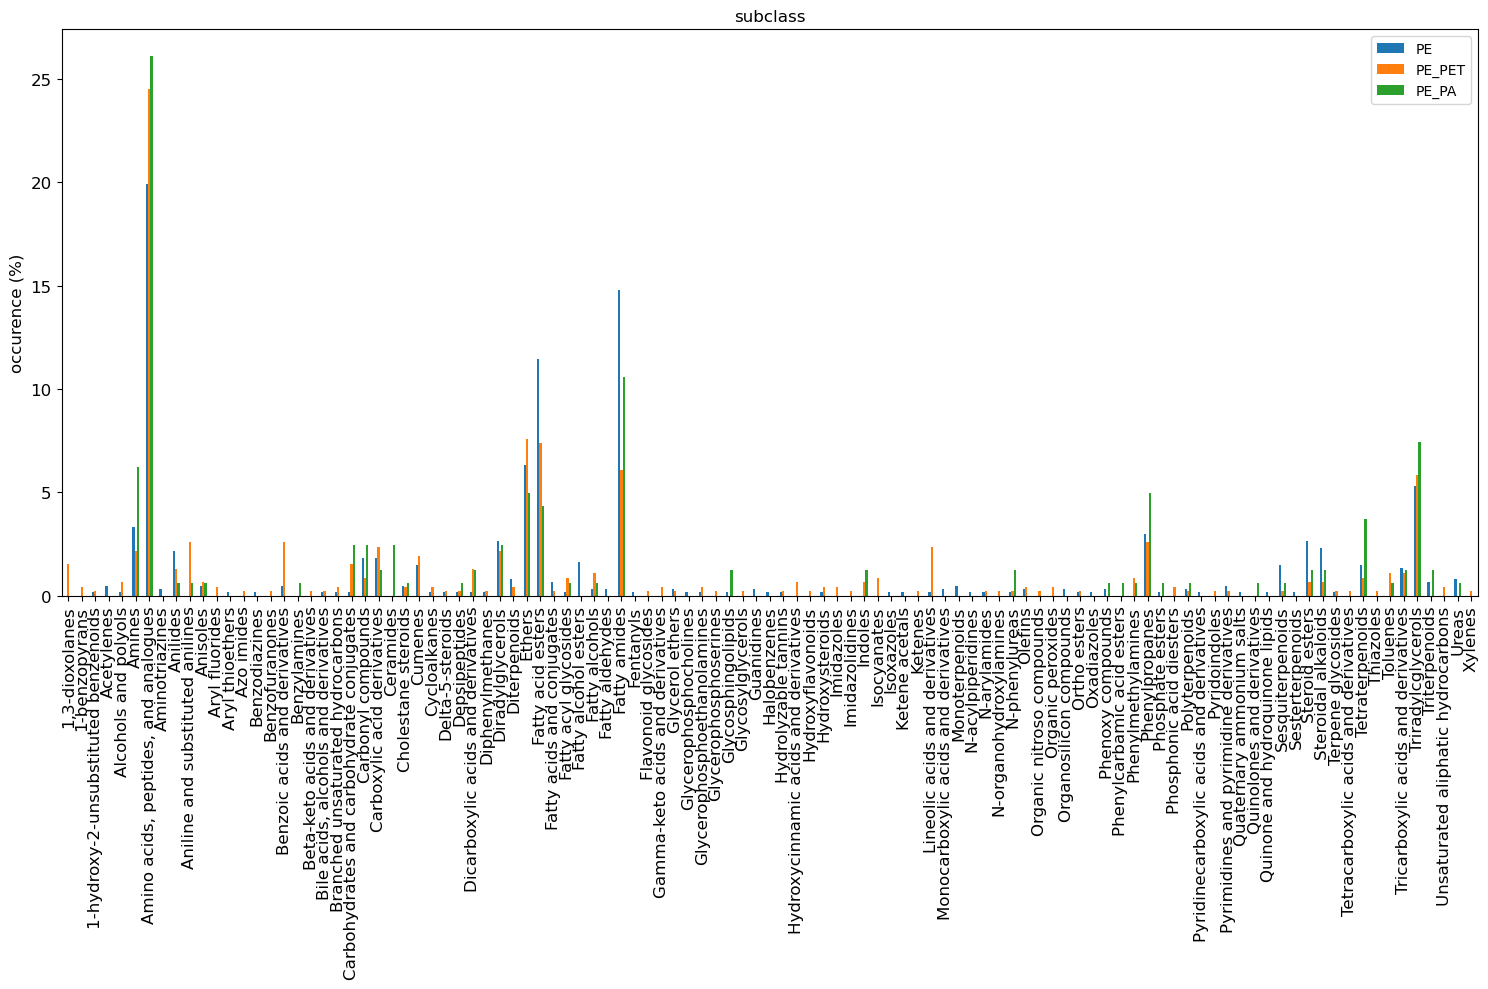

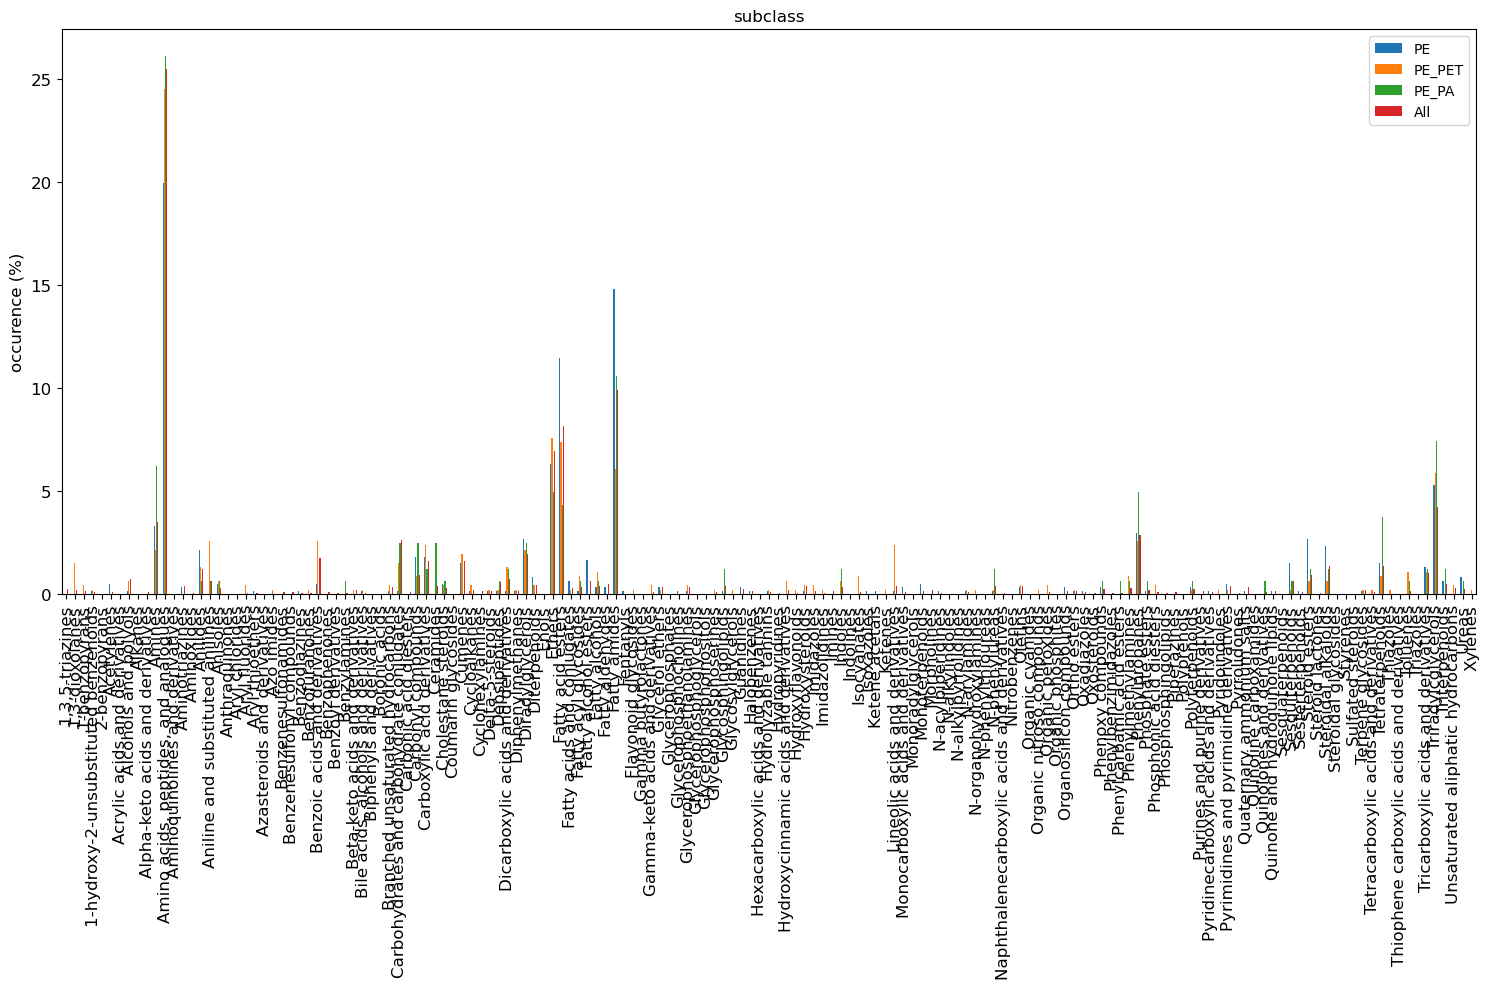

In [1]:
from typing import Iterable
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import main


In [ ]:

def create_counts_df(df: pd.DataFrame,col_to_plot: str,col_to_filter:str=None,normalize:bool=True) -> pd.DataFrame:
    """Creates a dataframe for"""
    df = df[df[col_to_plot]!= "N/A"] 
    if col_to_filter:
        df = df[col_to_plot][(df[col_to_filter] == True) & (df["is_blank"] == False)].value_counts(normalize=normalize)
    else: 
        df = df[col_to_plot][df["is_blank"] == False].value_counts(normalize=normalize)
    df=df.to_dict()
    df = pd.DataFrame.from_dict(df,orient="index")
    if col_to_filter is None:
        return df.rename(columns={0:"All"})
    return df.rename(columns={0:col_to_filter})

def join_counts(*dataframes: Iterable[pd.DataFrame]):
    if len(dataframes) == 1:
        return dataframes
    dfs = [dataframe for dataframe in dataframes]
    df_joined = dfs.pop(0)
    for i,df in enumerate(dfs):
        df_joined = df_joined.join(df,how="outer") #lsuffix=f"_{i+1}",rsuffix=f"_{i+2}"
    return df_joined.fillna(0)

def df_to_barplot(df:pd.DataFrame,columns:list[str],title: str,ytitle:str,fn: str) -> None:
    ax = df[columns].plot(kind='bar', title=title, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel(ytitle, fontsize=12)
    plt.tight_layout()
    plt.savefig(fn)


def df_to_counts_plot(df:pd.DataFrame,filter_cols: list[str],vis_col: str,fn:str,title:str,relative_counts: bool = True,include_nofilter:bool=False) -> None:
    count_dfs = [create_counts_df(df,vis_col,filter_col,normalize=relative_counts) for filter_col in filter_cols]
    if include_nofilter:
        count_dfs += create_counts_df(df,vis_col,normalize=relative_counts)
        filter_cols += "All"
    joined_df = join_counts(*count_dfs)
    ytitle = "Feature count"
    if relative_counts:
        joined_df = joined_df.apply(lambda x: x*100)
        ytitle = "occurence (%)"
    df_to_barplot(joined_df,columns=filter_cols,title=title,ytitle=ytitle,fn=fn)

In [167]:
# visualization_cols = ["CF:subclass", "CF:class", "CF:superclass"]
# vis_dfs = [create_counts_df(visualization_col) for visualization_col in visualization_cols]

def plot_classes(loc,relative_counts=True,filter_type="type",class_type="all"):
    filter_dict = {
        "type":["PE","PE_PET","PE_PA"],
        "state":["Removed_by_dec","Introduced_by_dec","Kept_by_dec"]
    } 
    class_dict={
        "canopus":["canopus:CF_subclass", "canopus:CF_class", "canopus:CF_superclass"],
        "classyfire":["CF:subclass", "CF:class", "CF:superclass"],
        "all":["subclass", "class", "superclass"]
    }
    vis_cols = class_dict[class_type]
    filter_cols = filter_dict[filter_type]

    counttype = "relative" if relative_counts else "absolute"
    for vis_col in vis_cols:
        
        fn = f"{loc}/{class_type}_classes_by_{filter_type}_{vis_col}_{counttype}_counts.png"
        df_to_counts_plot(nw,filter_cols,vis_col,fn=fn,title=vis_col,relative_counts=relative_counts)
        fn = f"{fn[:-4]}_all.png"
        df_to_counts_plot(nw,filter_cols,vis_col,fn=fn,title=vis_col,relative_counts=relative_counts,include_nofilter=True)

# settings =     fn="/lustre/BIF/nobackup/hendr218/Data/test.png" title="testtitle",relative_counts=False,ytitle="Feature_count"






In [142]:
test = ["PE","PE_PET","PE_PA"]
test.append(None)
print(test)

['PE', 'PE_PET', 'PE_PA', None]


In [137]:
plt.close()

ValueError: Unable to coerce to Series, length must be 1: given 3

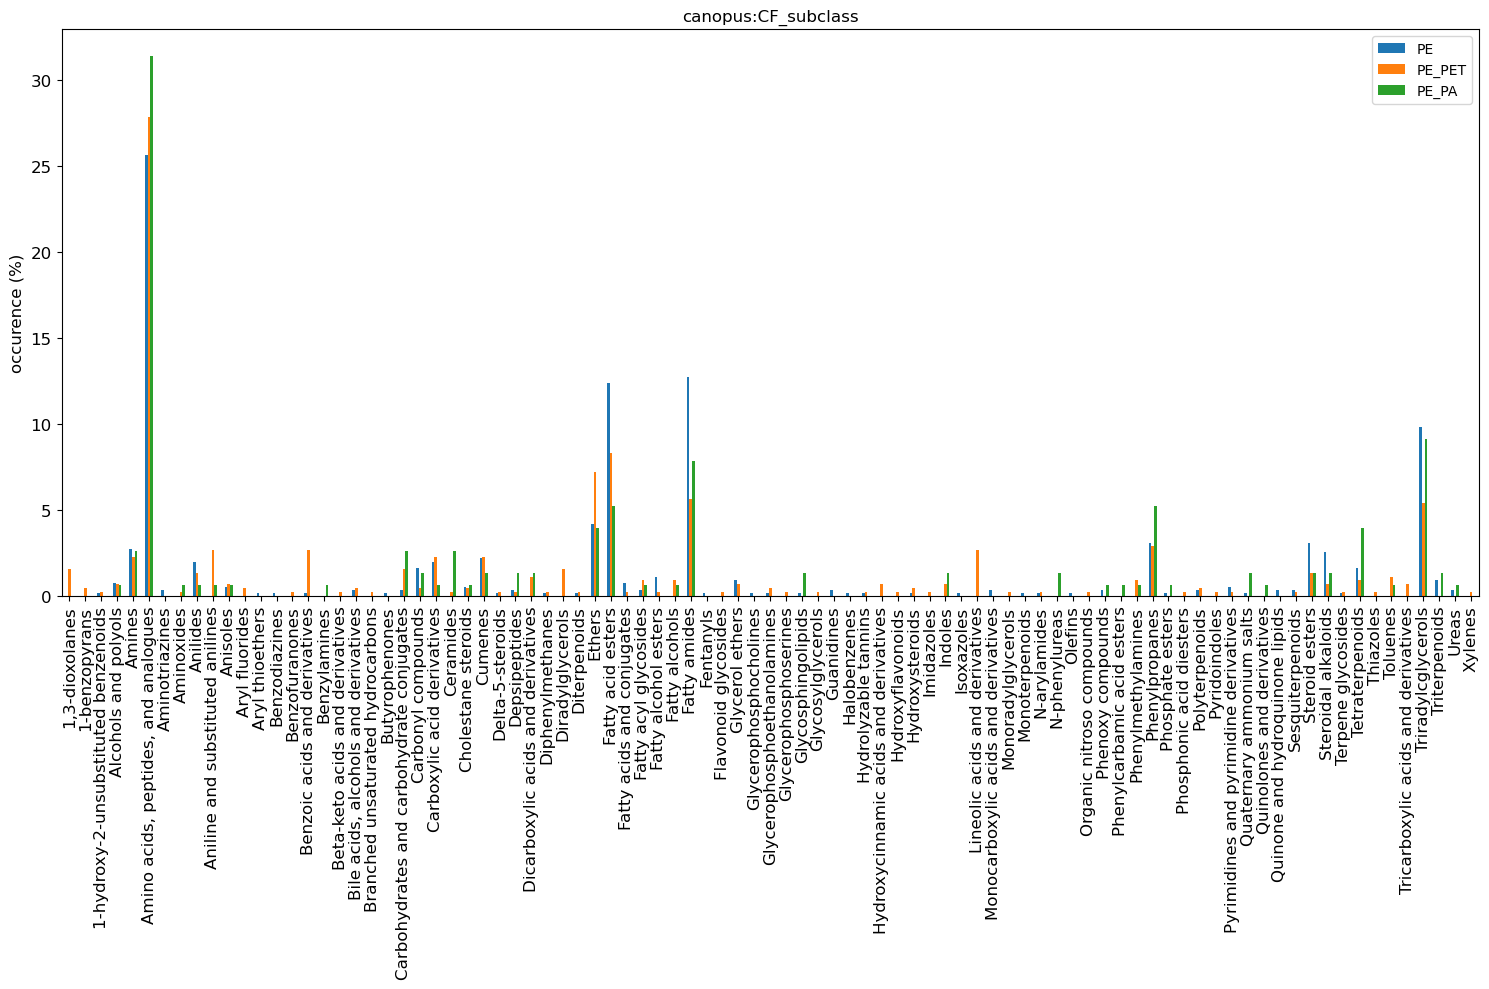

In [168]:
loc = "/lustre/BIF/nobackup/hendr218/Data/plot_tests"
for filter_type in ["type","state"]:
    for class_type in ["canopus","classyfire","all"]:
        plot_classes(loc,relative_counts=True,filter_type=filter_type,class_type=class_type)
        plot_classes(loc,relative_counts=False,filter_type=filter_type,class_type=class_type)
        plt.close()

In [14]:
dataframes = count_dfs
dfs = [dataframe for dataframe in dataframes]
df_joined = dfs.pop(0)
# dfs.pop(0)
# for i,df in enumerate(dfs):
#     df_joined = df_joined.join(df,lsuffix=f"_{i-1}",rsuffix=f"_{i}",how="outer")
# df_joined.fillna(0)
# # return df_joined

In [18]:
df_joined = df_joined.join(dfs[1],lsuffix="_left",rsuffix="_right",how="outer")

In [20]:
df_joined.fillna(0)

CF:class_left  CF:class_right  \
Allyl-type 1,3-dipolar organic compounds       0.000501        0.000000   
Azaspirodecane derivatives                     0.000501        0.000000   
Azoles                                         0.001002        0.000000   
Azolidines                                     0.000501        0.000000   
Benzene and substituted derivatives            0.002504        0.007101   
Carboxylic acids and derivatives               0.017526        0.015385   
Fatty Acyls                                    0.032048        0.036686   
Glycerolipids                                  0.022534        0.022485   
Haloacetylenes and derivatives                 0.001002        0.001183   
Heteroaromatic compounds                       0.000501        0.000000   
Keto acids and derivatives                     0.000501        0.001183   
Macrolactams                                   0.000000        0.000000   
N/A                                            0.878317        0.872189   
Organic carbonic acids and derivatives         0.001002        0.002367   
Organic oxides                                 0.000501        0.000000   
Organic phosphonic acids and derivatives       0.000501        0.000000   
Organic phosphoric acids and derivatives       0.000501        0.000000   
Organometalloid compounds                      0.000501        0.001183   
Organonitrogen compounds                       0.008012        0.005917   
Organooxygen compounds                         0.018528        0.024852   
Phenol ethers                                  0.000501        0.000000   
Piperidines                                    0.000501        0.000000   
Prenol lipids                                  0.005508        0.007101   
Pyridines and derivatives                      0.001502        0.000000   
Saturated hydrocarbons                         0.001002        0.001183   
Unsaturated hydrocarbons                       0.004006        0.001183   

                                          CF:class  
Allyl-type 1,3-dipolar organic compounds  0.000000  
Azaspirodecane derivatives                0.000000  
Azoles                                    0.000000  
Azolidines                                0.000000  
Benzene and substituted derivatives       0.005051  
Carboxylic acids and derivatives          0.015152  
Fatty Acyls                               0.080808  
Glycerolipids                             0.000000  
Haloacetylenes and derivatives            0.000000  
Heteroaromatic compounds                  0.000000  
Keto acids and derivatives                0.000000  
Macrolactams                              0.005051  
N/A                                       0.858586  
Organic carbonic acids and derivatives    0.000000  
Organic oxides                            0.005051  
Organic phosphonic acids and derivatives  0.000000  
Organic phosphoric acids and derivatives  0.000000  
Organometalloid compounds                 0.000000  
Organonitrogen compounds                  0.000000  
Organooxygen compounds                    0.010101  
Phenol ethers                             0.000000  
Piperidines                               0.005051  
Prenol lipids                             0.010101  
Pyridines and derivatives                 0.000000  
Saturated hydrocarbons                    0.000000  
Unsaturated hydrocarbons                  0.005051

In [131]:
def create_vc_df(df,col_to_plot,col_to_filter=None):
    if col_to_filter:
        df = df[col_to_plot][(df[col_to_filter] == True) & (df["is_blank"] == False)].value_counts(normalize=True)
    else: 
        df = df[col_to_plot][df["is_blank"] == False].value_counts(normalize=True)
    df=df.to_dict()
    df = pd.DataFrame.from_dict(df,orient="index",columns=[col_to_plot])
    return df

In [277]:
def create_vc_df(df,col_to_plot,col_to_filter=None,normalize=True):
    if col_to_filter:
        df = df[col_to_plot][(df[col_to_filter] == True) & (df["is_blank"] == False)].value_counts(normalize=normalize)
    else: 
        df = df[col_to_plot][df["is_blank"] == False].value_counts(normalize=normalize)
    df=df.to_dict()
    df = pd.DataFrame.from_dict(df,orient="index",columns=[col_to_plot])
    return df

In [298]:
col_to_plot = "canopus:CF_superclass"
col_to_filter = "PE_PET"
nw = df

In [133]:
tall = nw["canopus:CF_superclass"][(nw["PE_PET"] == True) & (nw["is_blank"] == False)].value_counts(normalize=True)
tall=tall.to_dict()
tall = pd.DataFrame.from_dict(tall,orient="index",columns=[col_to_plot])
tall

canopus:CF_superclass
Lipids and lipid-like molecules                       0.343013
Organic acids and derivatives                         0.263158
Benzenoids                                            0.205082
Organic oxygen compounds                              0.079855
Organoheterocyclic compounds                          0.061706
Organic nitrogen compounds                            0.023593
Phenylpropanoids and polyketides                      0.014519
Organohalogen compounds                               0.003630
Nucleosides, nucleotides, and analogues               0.003630
Hydrocarbons                                          0.001815

In [110]:
import matplotlib.pyplot as plt

In [158]:
df["all_metadata"]

9984              []
1439     [PE_PA_Dec]
41251             []
10144             []
1071     [PE_PET_PC]
            ...     
13005             []
42059    [PE_PET_PC]
3060              []
28077             []
31713             []
Name: all_metadata, Length: 8749, dtype: object

ALL         PA         PE        PET
Benzenoids                        17.084228  20.095694  16.687898  19.963702
Hydrocarbons                       1.073729   0.000000   0.891720   1.451906
Lipids and lipid-like molecules   38.033882  39.712919  49.299363  30.671506
Organic acids and derivatives     24.314006  24.401914  18.853503  25.226860
Organic nitrogen compounds         3.889287   4.784689   3.057325   3.266788
Organic oxygen compounds           9.472680   8.133971   7.006369  10.163339
Organoheterocyclic compounds       4.819852   1.913876   3.184713   7.078040
Phenylpropanoids and polyketides   0.715820   0.478469   0.254777   1.451906

In [299]:
onw = nw

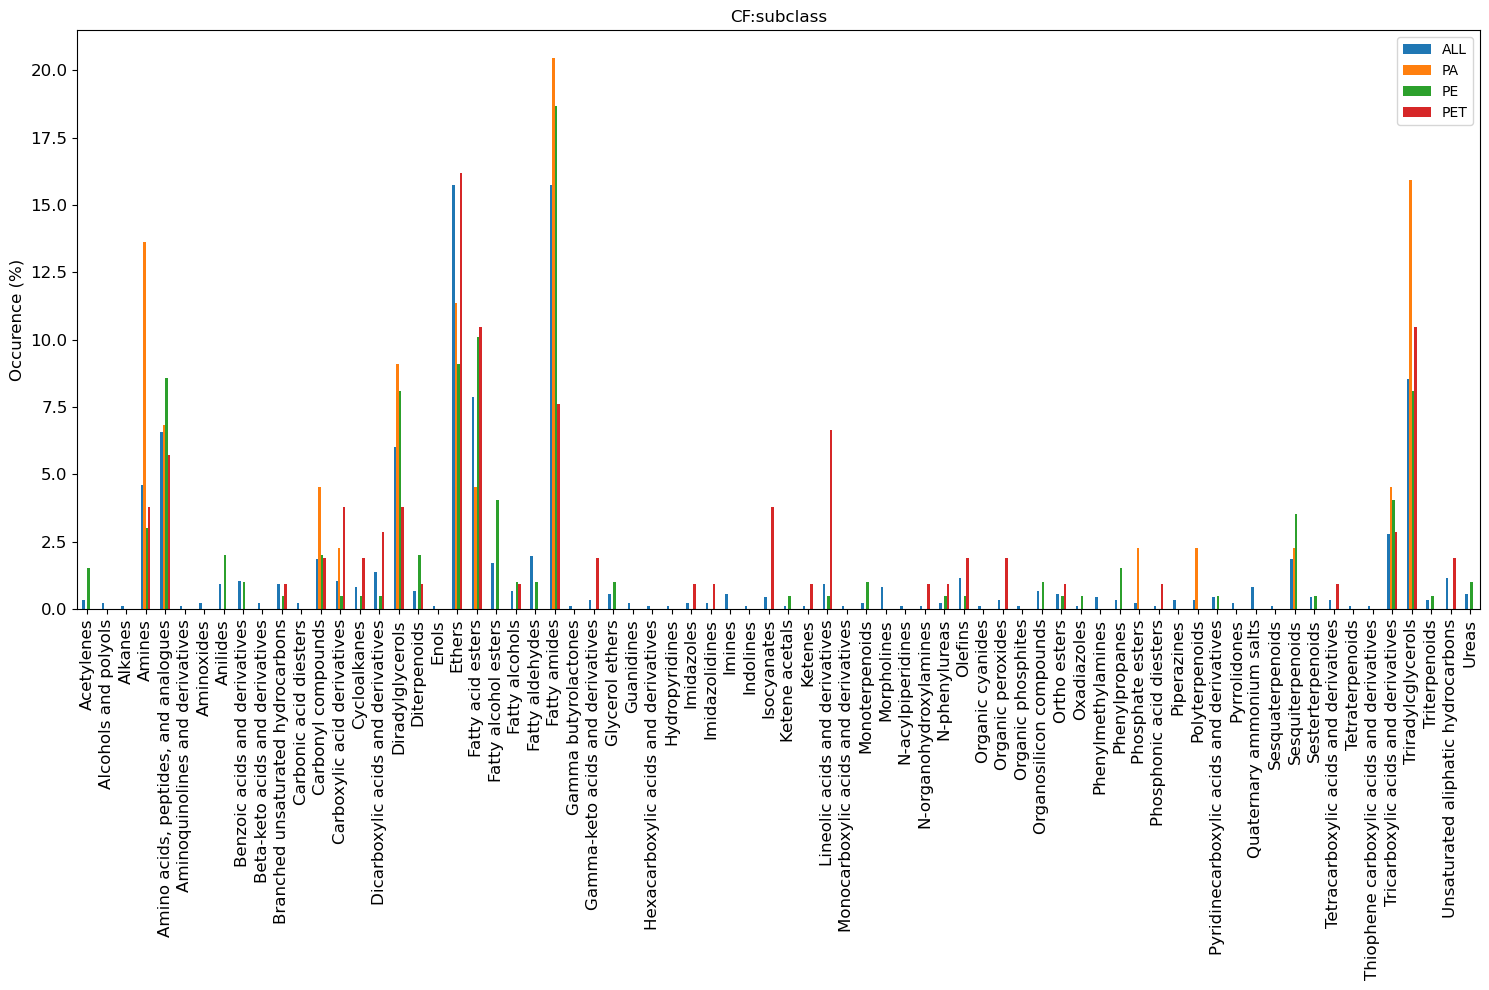

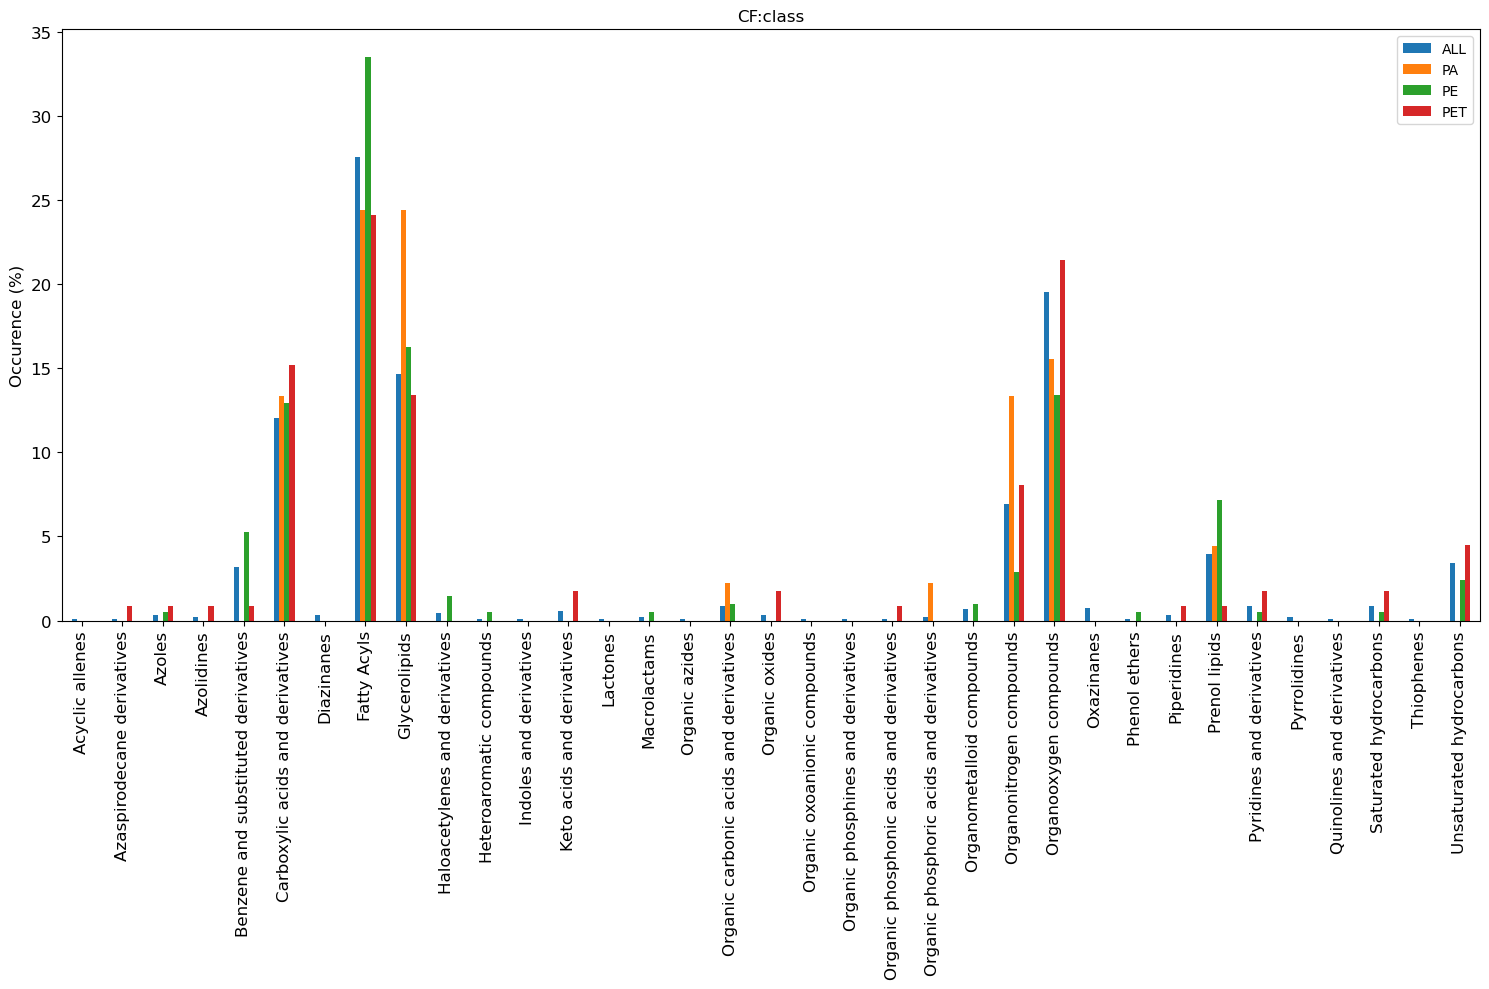

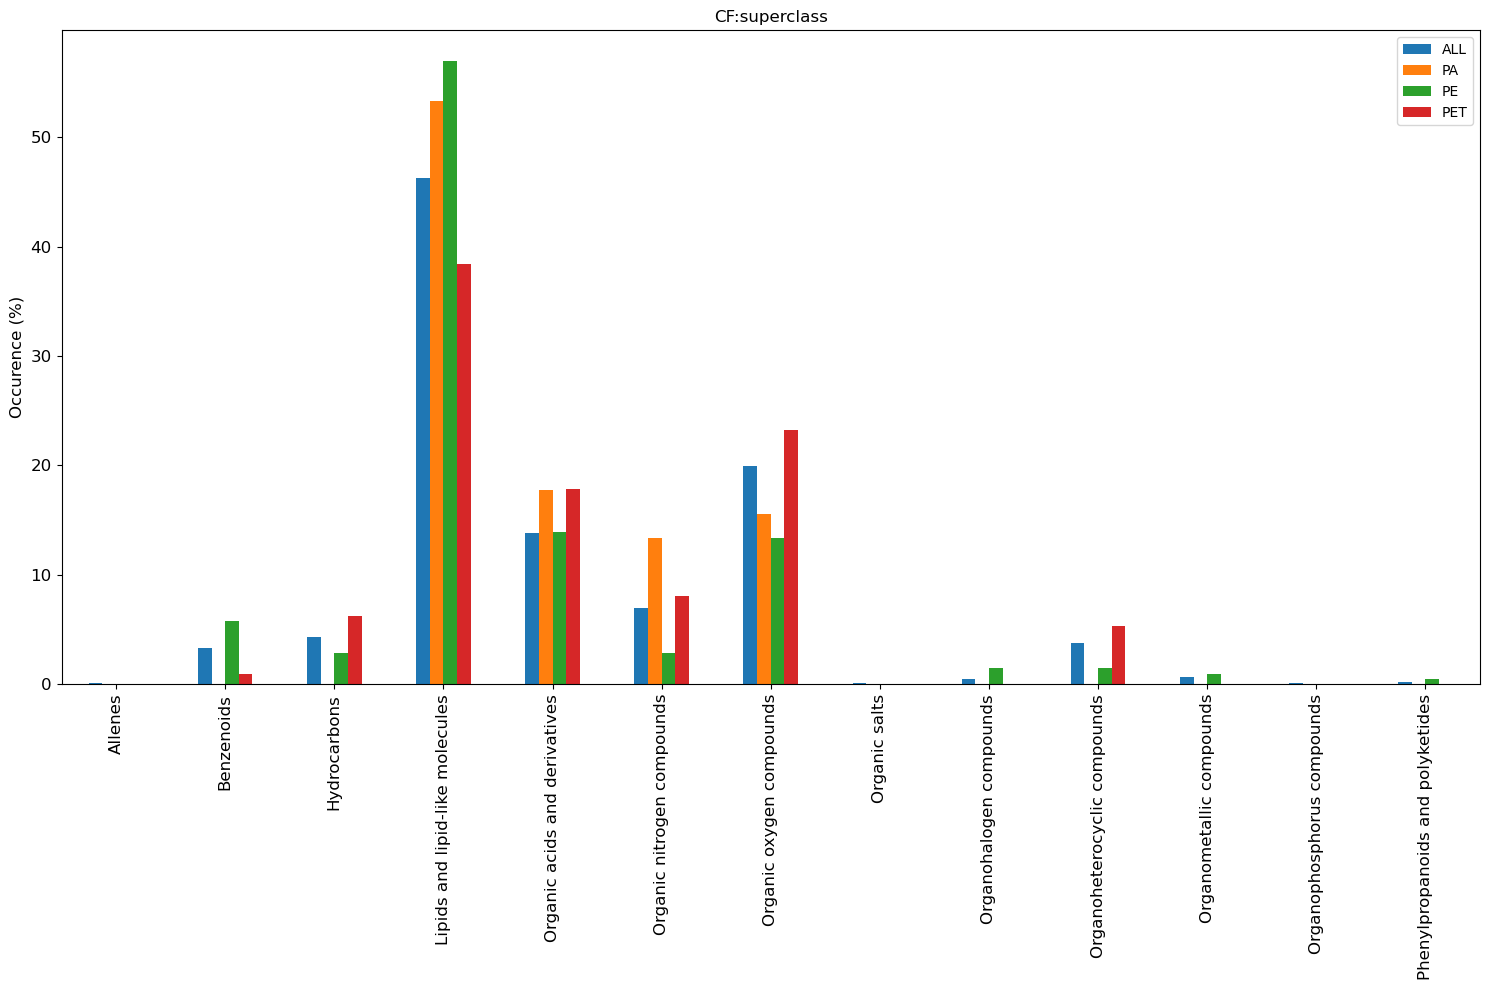

In [204]:
for vis_col in ["CF:subclass", "CF:class", "CF:superclass"]:
    nw = onw[onw[vis_col] != "N/A"]
    PE_PET = create_vc_df(nw,vis_col,col_to_filter="PE_PET")
    PE_PA = create_vc_df(nw,vis_col,col_to_filter="PE_PA")
    PE = create_vc_df(nw,vis_col,col_to_filter="PE")
    ALL = create_vc_df(nw,vis_col)

    df_joined = PE.join(PE_PET,lsuffix="_PE",rsuffix="_PET", how="outer")
    df_joined2 = ALL.join(PE_PA,lsuffix="_ALL",rsuffix="_PA", how="outer")
    df_joined = df_joined2.join(df_joined,how="outer").fillna(0)
    df_joined = df_joined.apply(lambda x: x*100)
    df_joined = df_joined.rename(columns=lambda x: x.split("_")[-1])
    if vis_col == "subclass":
        df_joined = df_joined[df_joined.apply(lambda row: any([i > 1  for i in row]),axis=1)] 
    ax = df_joined[["ALL","PA","PE","PET"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_{vis_col}_by_plastic_type.png"
    plt.tight_layout()
    plt.savefig(fig_name)

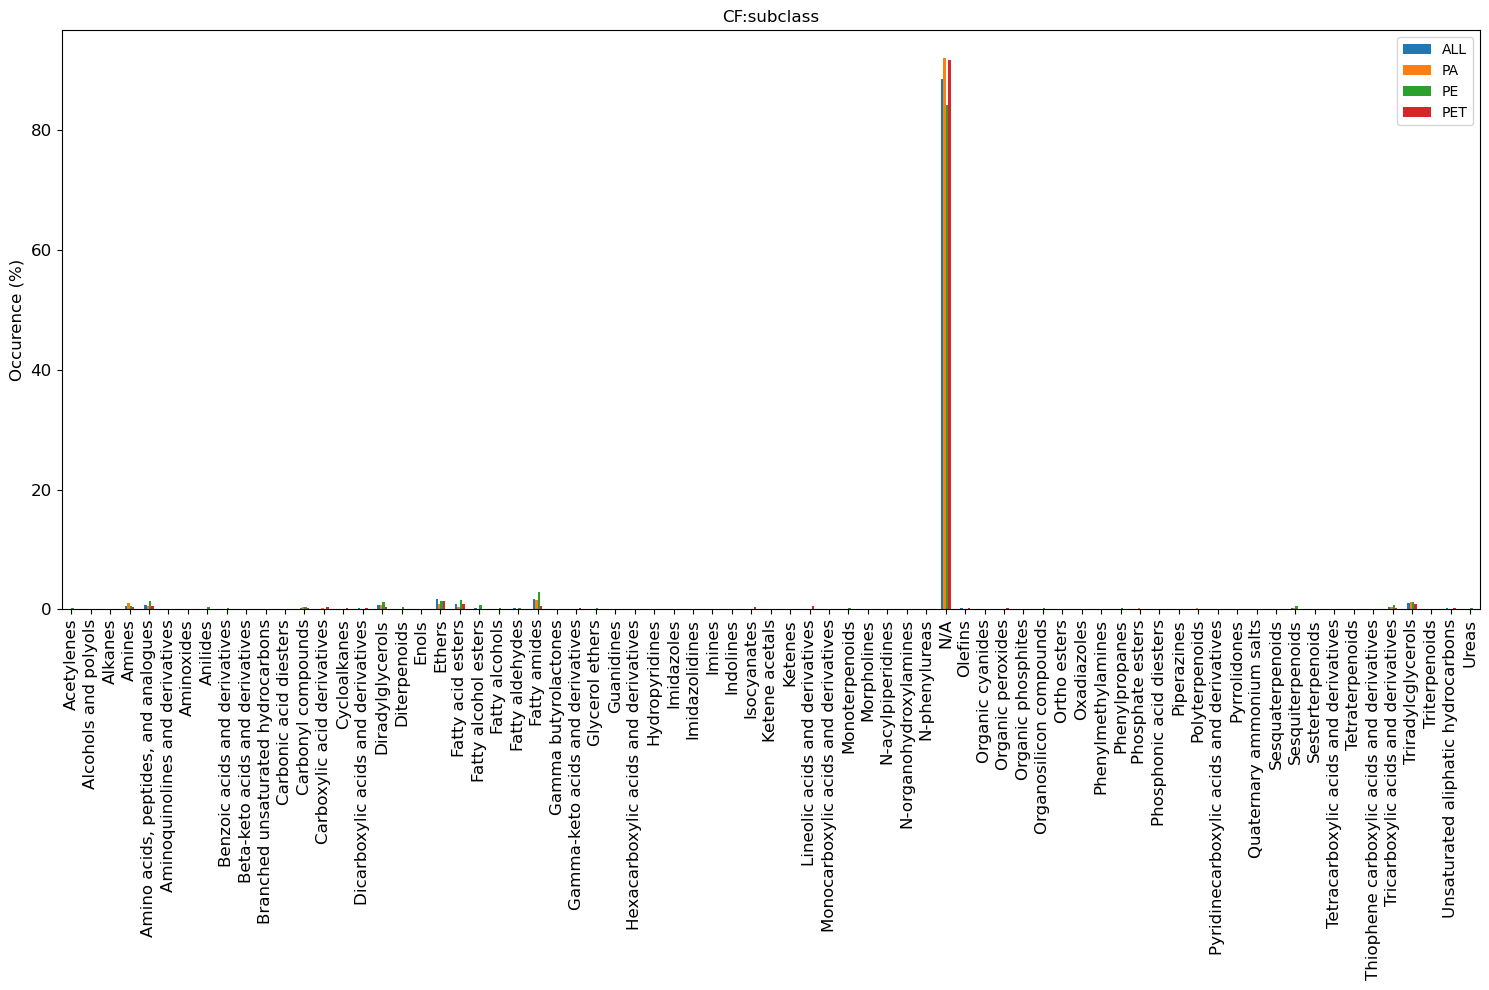

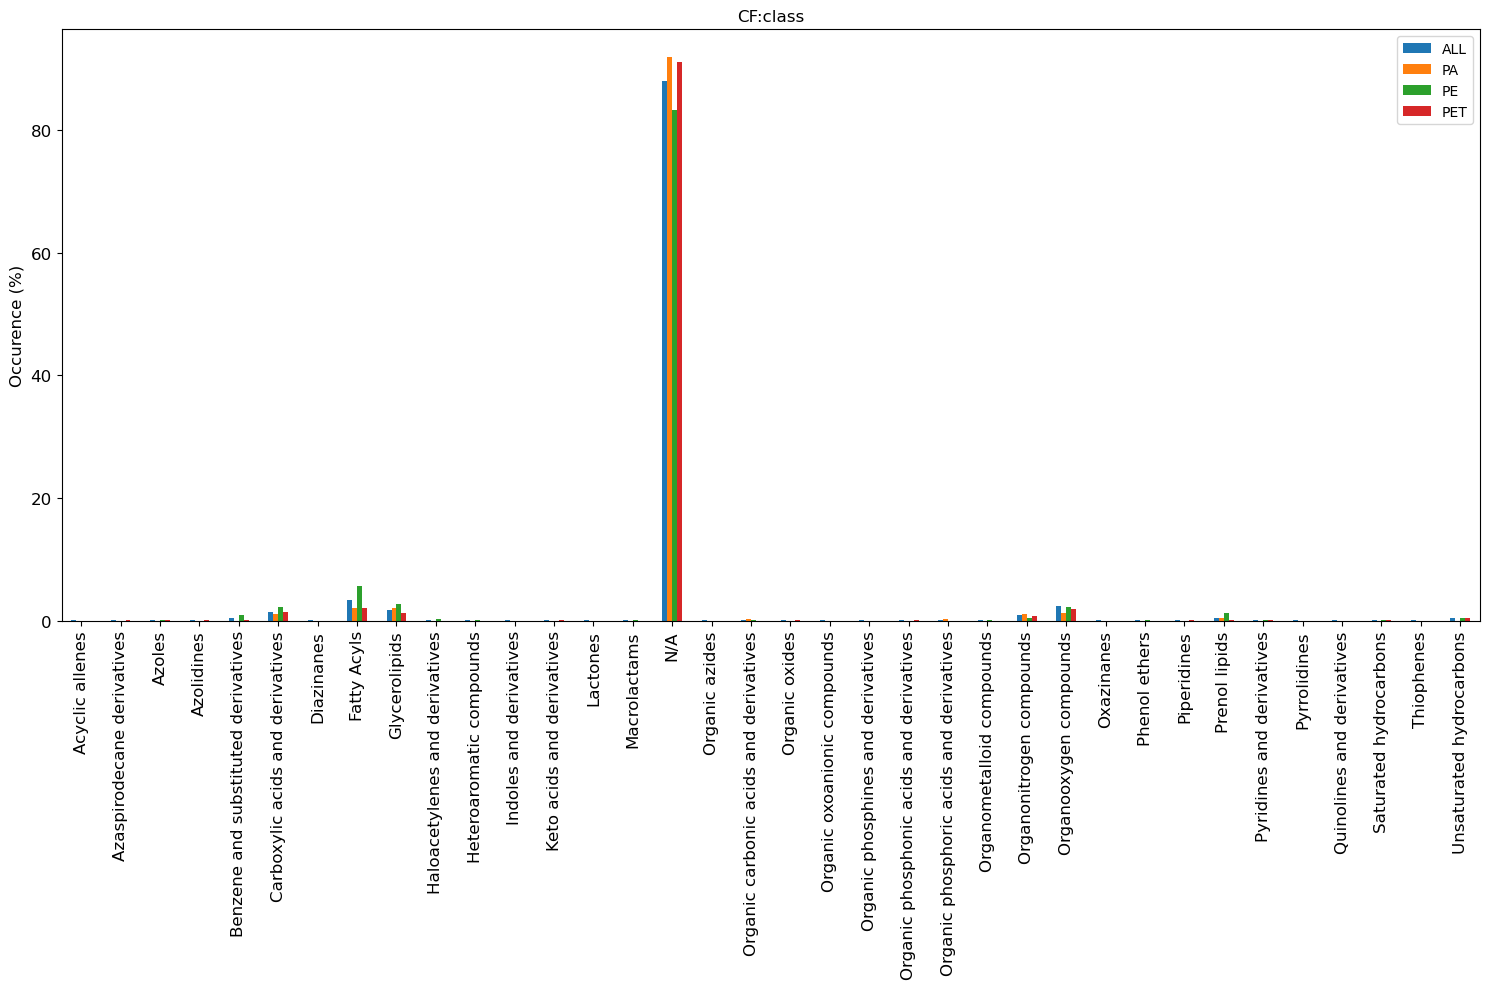

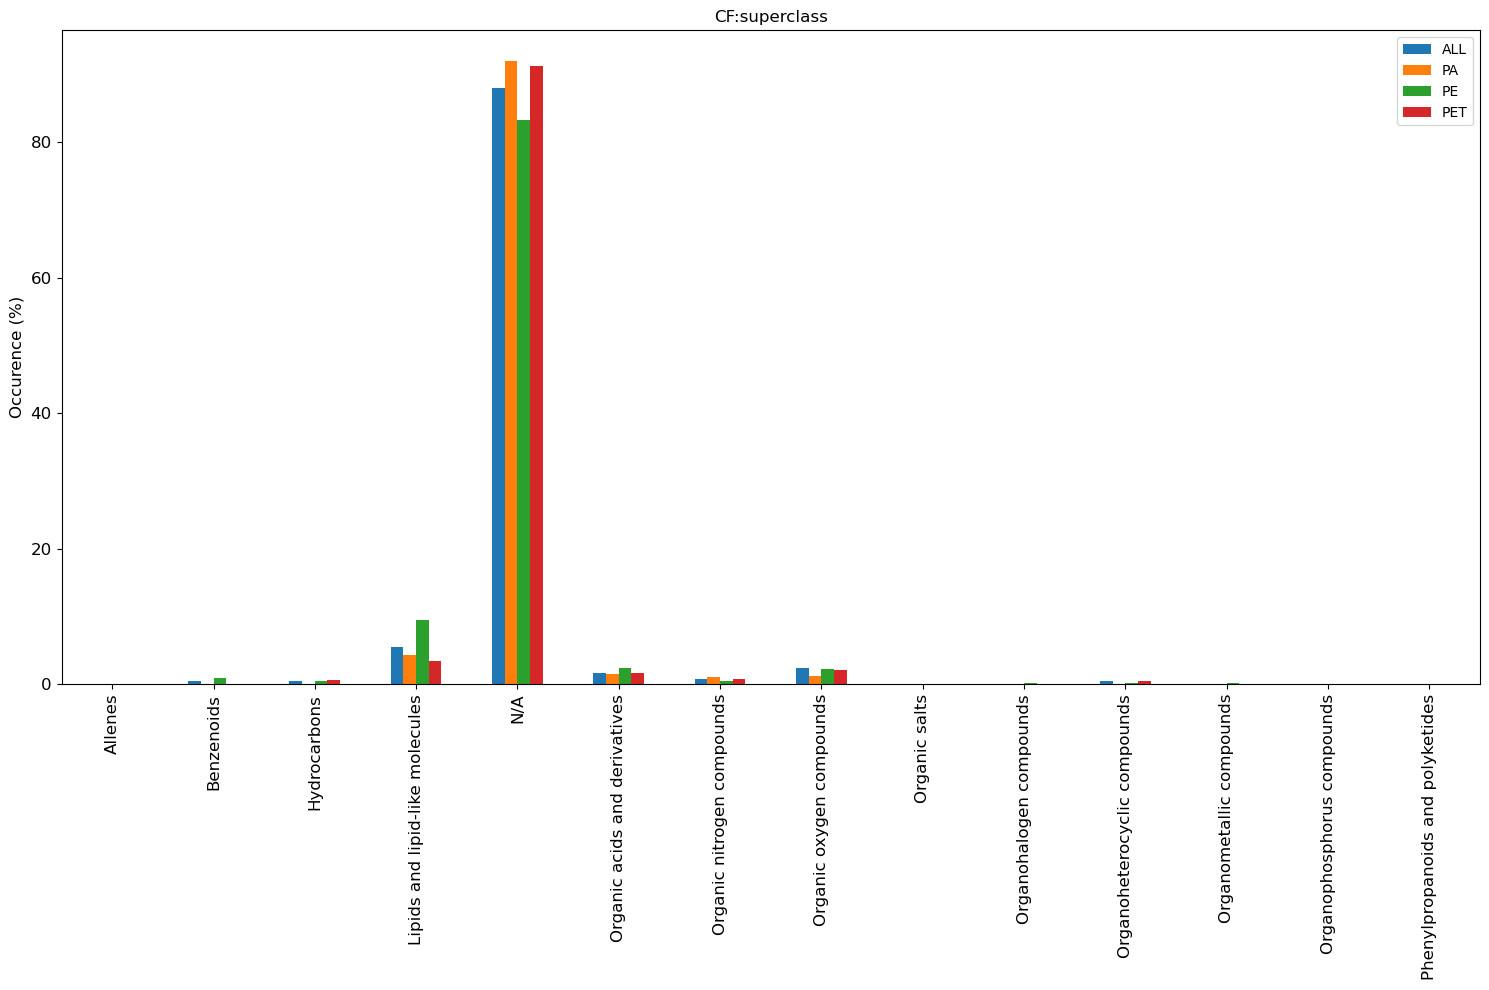

In [ ]:
for vis_col in ["subclass", "class", "superclass"]:
    PE_PET = create_vc_df(nw,vis_col,col_to_filter="PE_PET")
    PE_PA = create_vc_df(nw,vis_col,col_to_filter="PE_PA")
    PE = create_vc_df(nw,vis_col,col_to_filter="PE")
    ALL = create_vc_df(nw,vis_col)

    df_joined = PE.join(PE_PET,lsuffix="_PE",rsuffix="_PET", how="outer")
    df_joined2 = ALL.join(PE_PA,lsuffix="_ALL",rsuffix="_PA", how="outer")
    df_joined = df_joined2.join(df_joined,how="outer").fillna(0)
    df_joined = df_joined.apply(lambda x: x*100)
    df_joined = df_joined.rename(columns=lambda x: x.split("_")[-1])
    if vis_col == "subclass":
        df_joined = df_joined[df_joined.apply(lambda row: any([i > 1  for i in row]),axis=1)] 
    ax = df_joined[["ALL","PA","PE","PET"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_{vis_col}_by_plastic_type.png"
    plt.tight_layout()
    plt.savefig(fig_name)

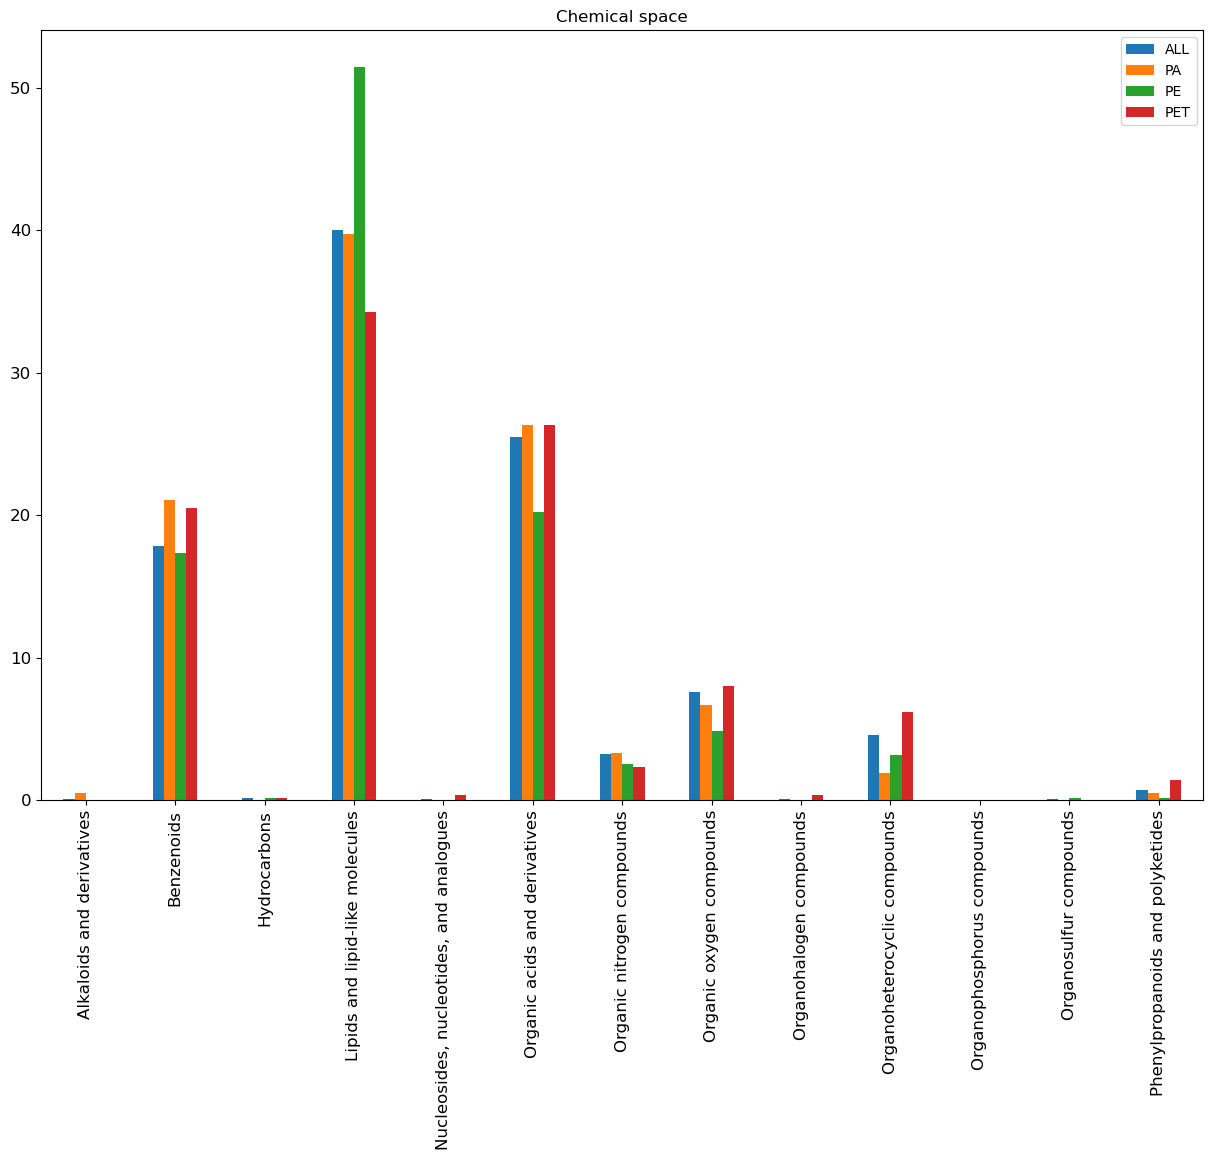

In [ ]:
for vis_col in ["subclass", "class", "superclass"]:
    PE_PET = create_vc_df(nw,vis_col,col_to_filter="PE_PET")
    PE_PA = create_vc_df(nw,vis_col,col_to_filter="PE_PA")
    PE = create_vc_df(nw,vis_col,col_to_filter="PE")
    ALL = create_vc_df(nw,vis_col)

    df_joined = PE.join(PE_PET,lsuffix="_PE",rsuffix="_PET", how="outer")
    df_joined2 = ALL.join(PE_PA,lsuffix="_ALL",rsuffix="_PA", how="outer")
    df_joined = df_joined2.join(df_joined,how="outer").fillna(0)
    df_joined = df_joined.apply(lambda x: x*100)
    df_joined = df_joined.rename(columns=lambda x: x.split("_")[-1])
    if vis_col == "subclass":
        df_joined = df_joined[df_joined.apply(lambda row: any([i > 1  for i in row]),axis=1)] 
    ax = df_joined[["ALL","PA","PE","PET"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_{vis_col}_by_plastic_type.png"
    plt.tight_layout()
    plt.savefig(fig_name)

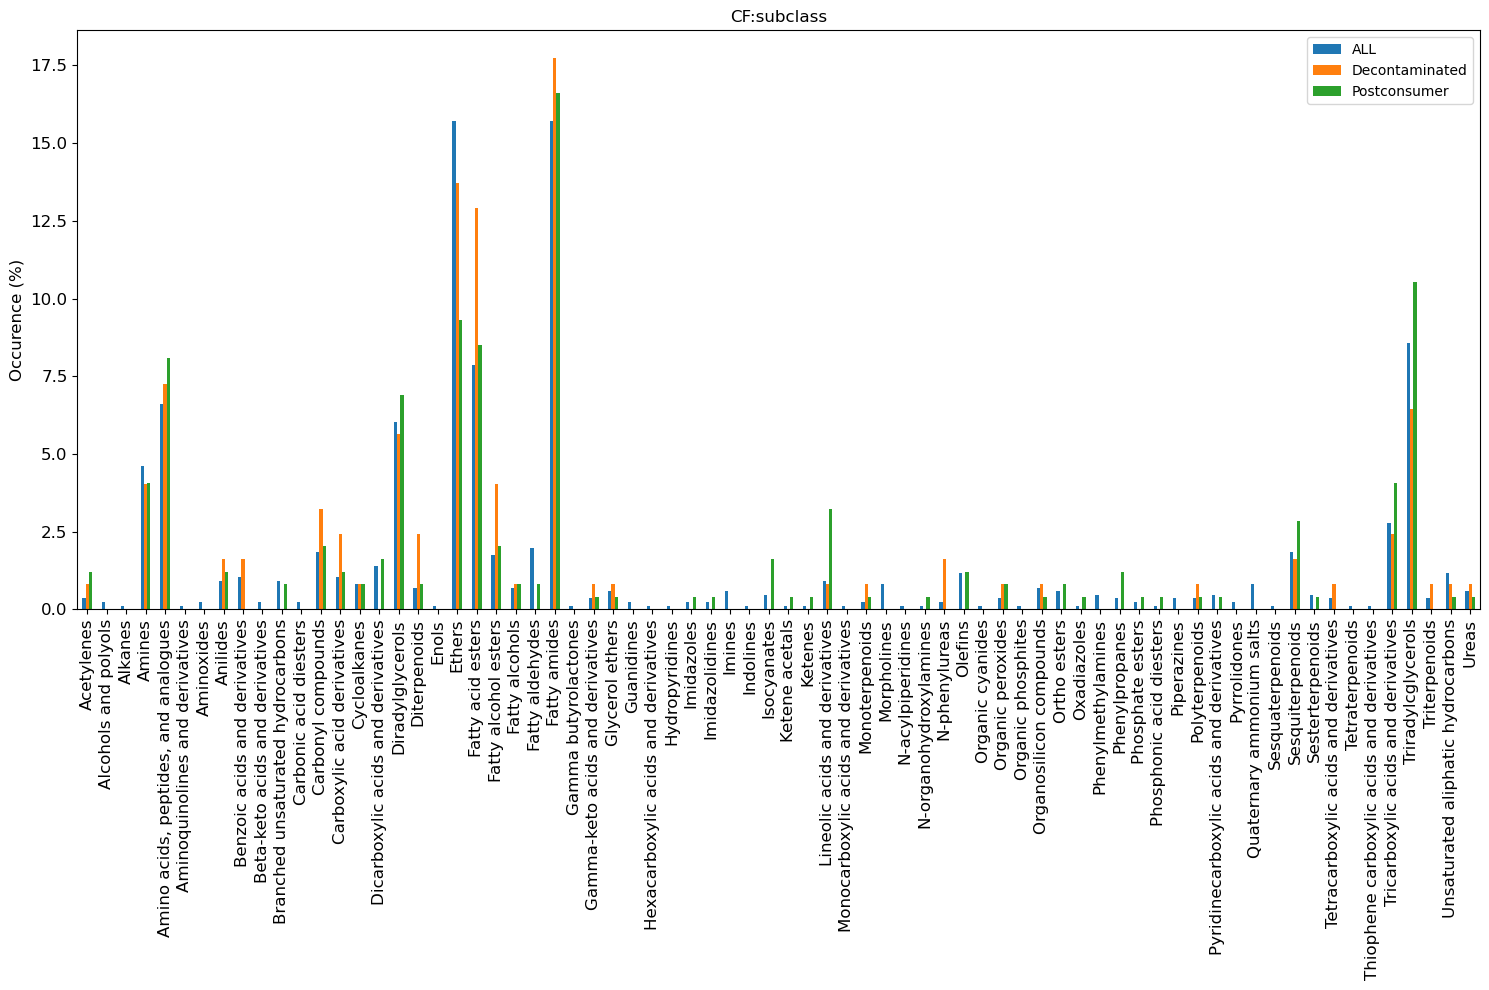

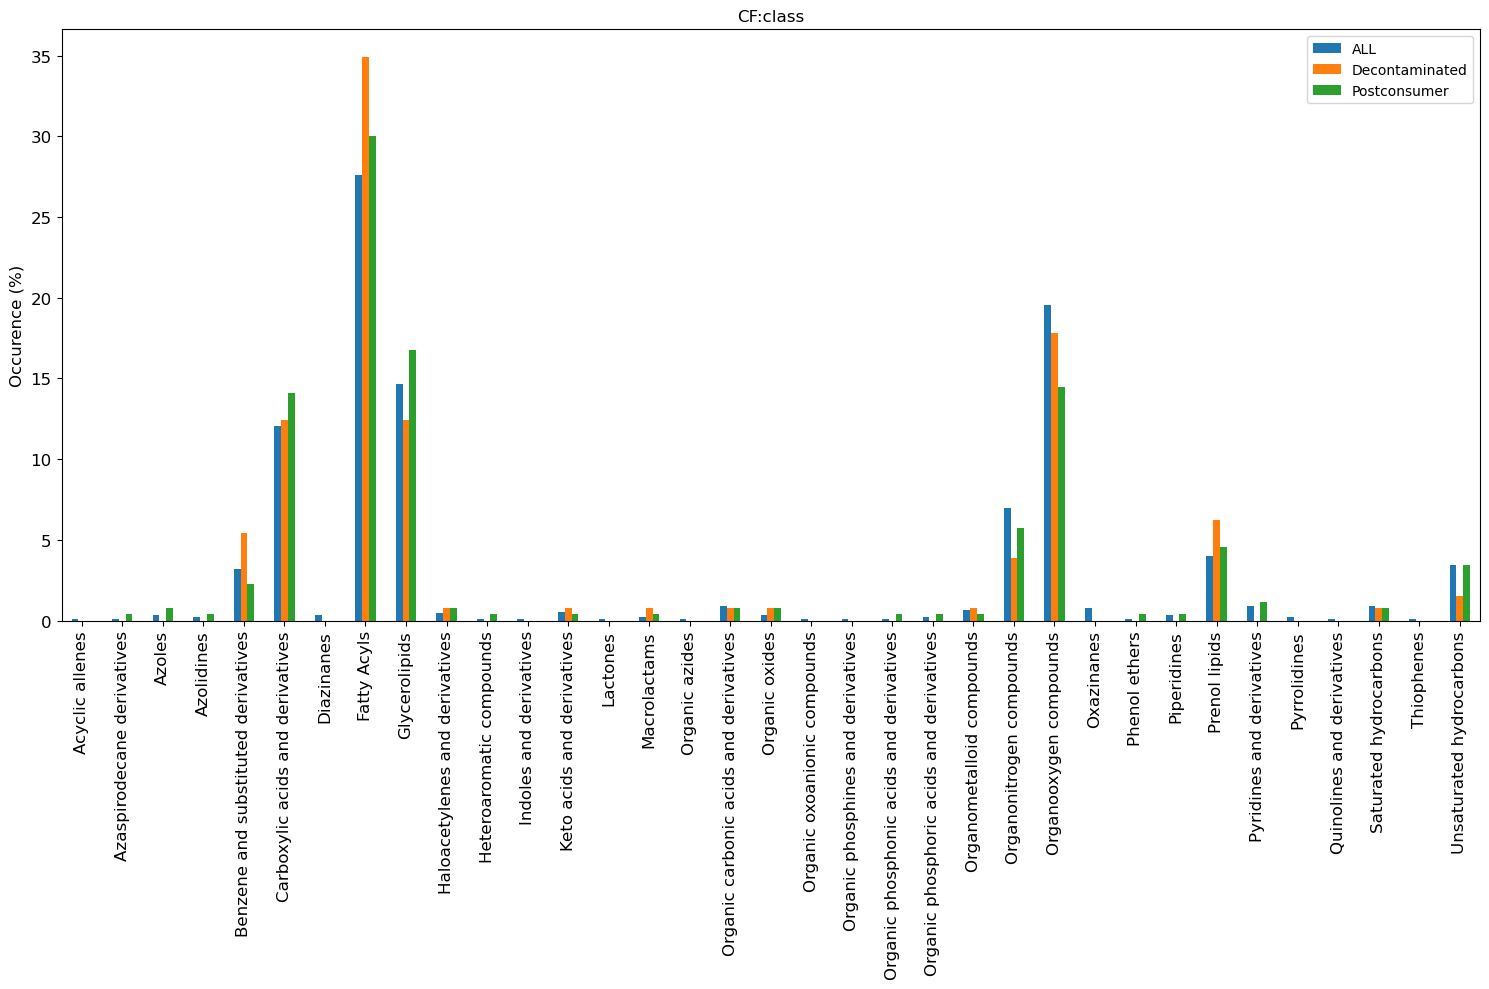

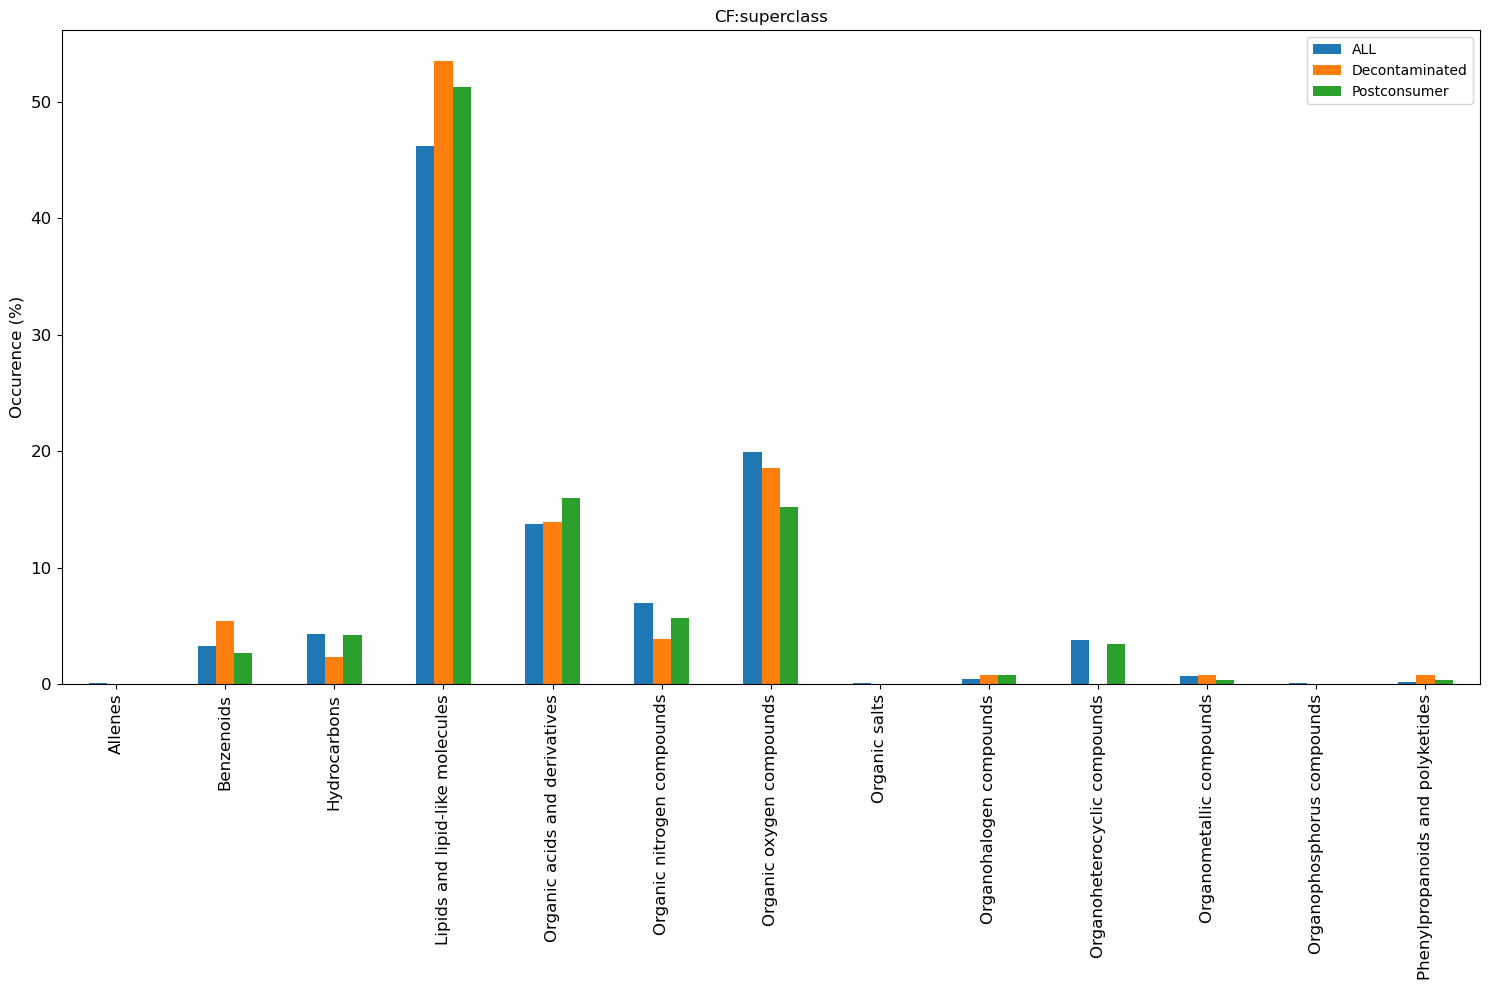

In [246]:
for vis_col in ["CF:subclass", "CF:class", "CF:superclass"]:
    nw = onw[onw[vis_col] != "N/A"]
    DEC = create_vc_df(nw,vis_col,col_to_filter="Decontaminated")
    PC = create_vc_df(nw,vis_col,col_to_filter="Postconsumer")
    ALL = create_vc_df(nw,vis_col)

    df_joined = DEC.join(PC,lsuffix="_DEC",rsuffix="_PC", how="outer")
    df_joined2 = ALL.join(df_joined,how="outer",lsuffix="_ALL")
    df_joined = df_joined2.rename(columns={vis_col:"ALL",f"{vis_col}_DEC": "Decontaminated",f"{vis_col}_PC":"Postconsumer"})

    df_joined = df_joined.apply(lambda x: x*100)
    ax = df_joined[["ALL","Decontaminated","Postconsumer"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_{vis_col}_by_plastic_state.png"
    plt.tight_layout()
    plt.savefig(fig_name)

In [253]:
df["removed_by_dec"]

9984     False
33124     True
39965     True
19167    False
24065     True
         ...  
13005    False
42059     True
3060     False
28077    False
31713    False
Name: removed_by_dec, Length: 8749, dtype: bool

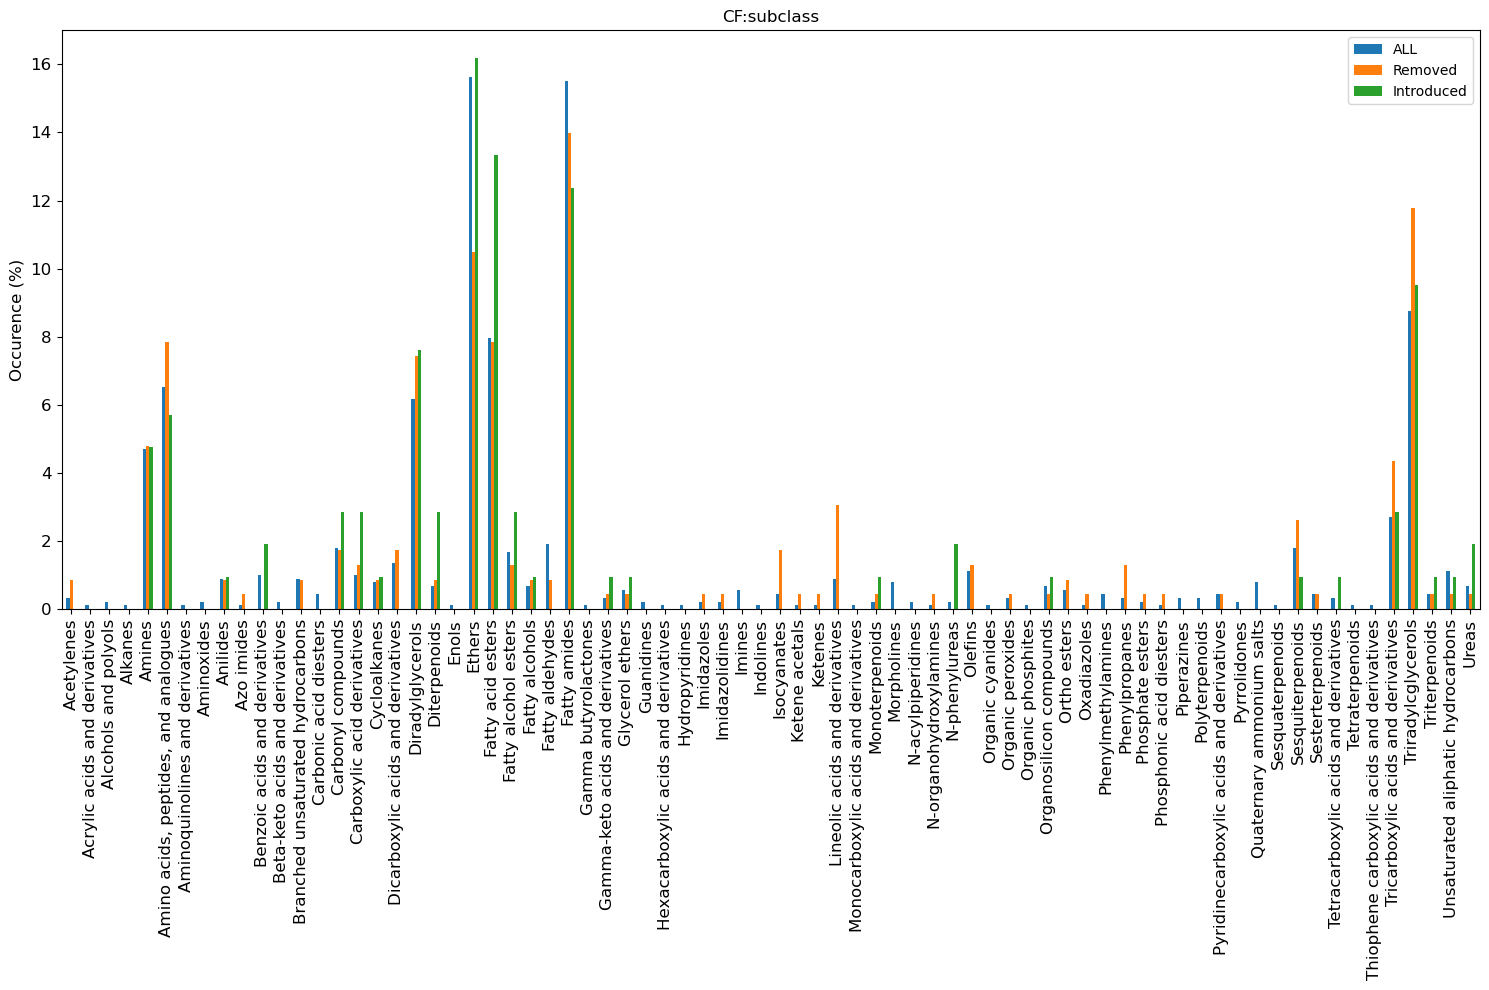

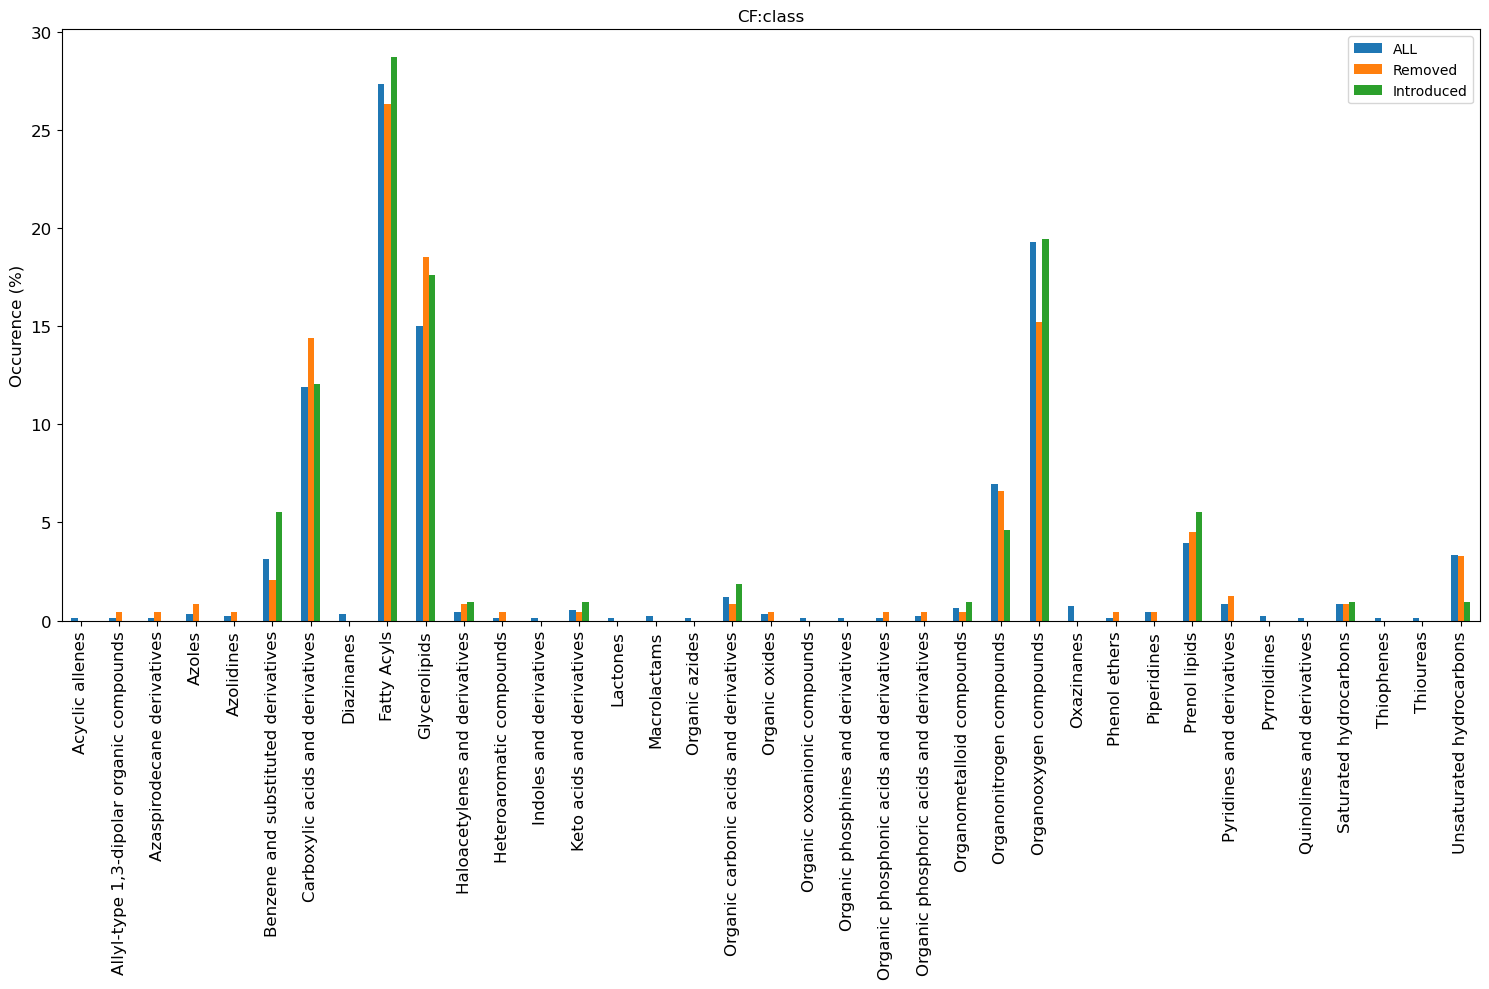

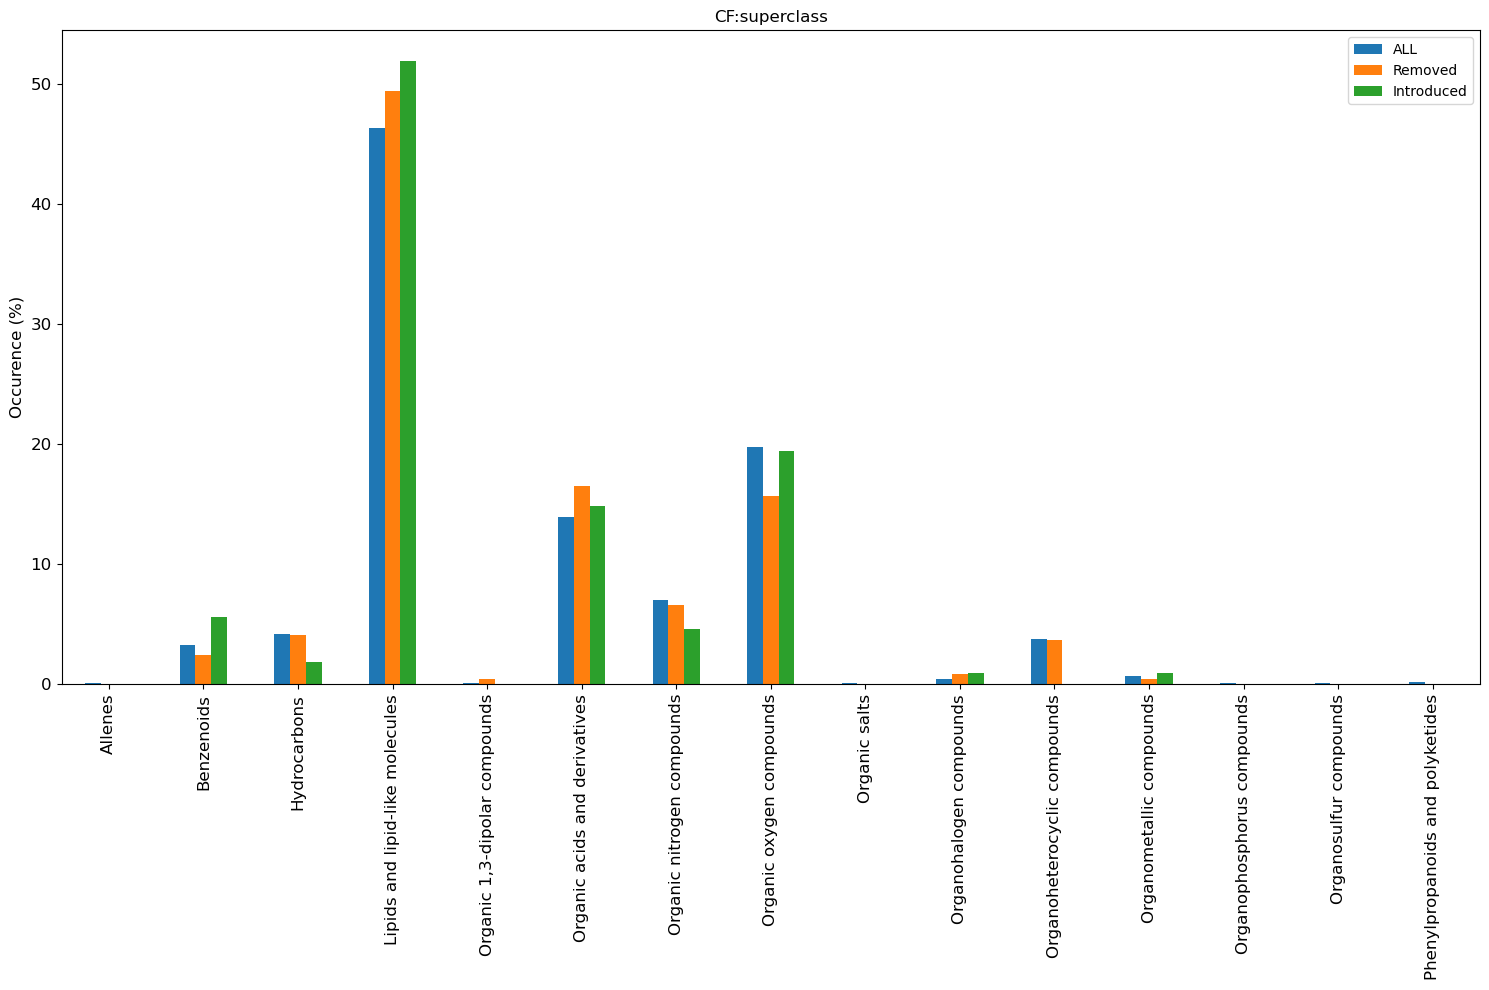

In [259]:
for vis_col in ["CF:subclass", "CF:class", "CF:superclass"]:
    nw = onw[onw[vis_col] != "N/A"]
    RM = create_vc_df(nw,vis_col,col_to_filter="removed_by_dec")
    IN = create_vc_df(nw,vis_col,col_to_filter="Introduced_by_dec")
    ALL = create_vc_df(nw,vis_col)

    df_joined = RM.join(IN,lsuffix="_RM",rsuffix="_IN", how="outer")
    df_joined2 = ALL.join(df_joined,how="outer",lsuffix="_ALL")
    df_joined = df_joined2.rename(columns={vis_col:"ALL",f"{vis_col}_RM": "Removed",f"{vis_col}_IN":"Introduced"})
    df_joined = df_joined.apply(lambda x: x*100)
    ax = df_joined[["ALL","Removed","Introduced"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_{vis_col}_intod_remov.png"
    plt.tight_layout()
    plt.savefig(fig_name)

In [281]:
df[df["Kept_by_dec"]]


sirius_db:molecularFormula                   canopus:CF_subclass  \
6588                    C20H38O2  Amino acids, peptides, and analogues   
42772                 C40H80N2O2                                   NaN   
22401                   C18H38O4                                   NaN   
3933                      C17H32                                   NaN   
33311                   C40H70O4  Amino acids, peptides, and analogues   
...                          ...                                   ...   
39778                        NaN                                   NaN   
41295                        NaN                                   NaN   
39348                        NaN                                   NaN   
38770                        NaN                                   NaN   
40706                        NaN                                   NaN   

                       canopus:CF_class          canopus:CF_superclass  \
6588   Carboxylic acids and derivatives  Organic acids and derivatives   
42772                               NaN                            NaN   
22401                               NaN                            NaN   
3933                                NaN                            NaN   
33311  Carboxylic acids and derivatives  Organic acids and derivatives   
...                                 ...                            ...   
39778                               NaN                            NaN   
41295                               NaN                            NaN   
39348                               NaN                            NaN   
38770                               NaN                            NaN   
40706                               NaN                            NaN   

      canopus:CF_most_specific_class  \
6588     Amino acids and derivatives   
42772                            NaN   
22401                            NaN   
3933                             NaN   
33311    Amino acids and derivatives   
...                              ...   
39778                            NaN   
41295                            NaN   
39348                            NaN   
38770                            NaN   
40706                            NaN   

                          canopus:CF_all_classifications  \
6588   Organic compounds; Amino acids, peptides, and ...   
42772                                                NaN   
22401                                                NaN   
3933                                                 NaN   
33311  Organic compounds; Organoheterocyclic compound...   
...                                                  ...   
39778                                                NaN   
41295                                                NaN   
39348                                                NaN   
38770                                                NaN   
40706                                                NaN   

      sirius:molecularFormula sirius:adduct  sirius:Zodiac_Score  \
6588               C20H32N2O3      [M + H]+                  NaN   
42772              C40H80N2O2     [M + Na]+                  NaN   
22401              C16H39N4O3      [M + H]+                  NaN   
3933                   C17H32      [M + K]+                  NaN   
33311              C37H68N2O6      [M + H]+                  NaN   
...                       ...           ...                  ...   
39778                     NaN           NaN                  NaN   
41295                     NaN           NaN                  NaN   
39348                     NaN           NaN                  NaN   
38770                     NaN           NaN                  NaN   
40706                     NaN           NaN                  NaN   

       sirius:TreeIsotope_Score  ...  PE_PET  Decontaminated  Postconsumer  \
6588                     33.674  ...   False            True          True   
42772                     5.177  ...    True         

In [288]:
create_vc_df(nw,vis_col,col_to_filter="Removed_by_dec",normalize=False)

KeyError: 'Removed_by_dec'

In [ ]:
def create_vc_df(df,col_to_plot,col_to_filter=None,normalize=True):
    if col_to_filter:
        df = df[col_to_plot][(df[col_to_filter] == True) & (df["is_blank"] == False)].value_counts(normalize=normalize)
    else: 
        df = df[col_to_plot][df["is_blank"] == False].value_counts(normalize=normalize)
    df=df.to_dict()
    df = pd.DataFrame.from_dict(df,orient="index",columns=[col_to_plot])
    return df

In [296]:
df[col_to_filter]

9984     False
33124     True
39965     True
19167    False
24065     True
         ...  
13005    False
42059     True
3060     False
28077    False
31713    False
Name: Removed_by_dec, Length: 8749, dtype: bool

In [297]:
col_to_filter="Removed_by_dec"
nw[col_to_filter]

KeyError: 'Removed_by_dec'

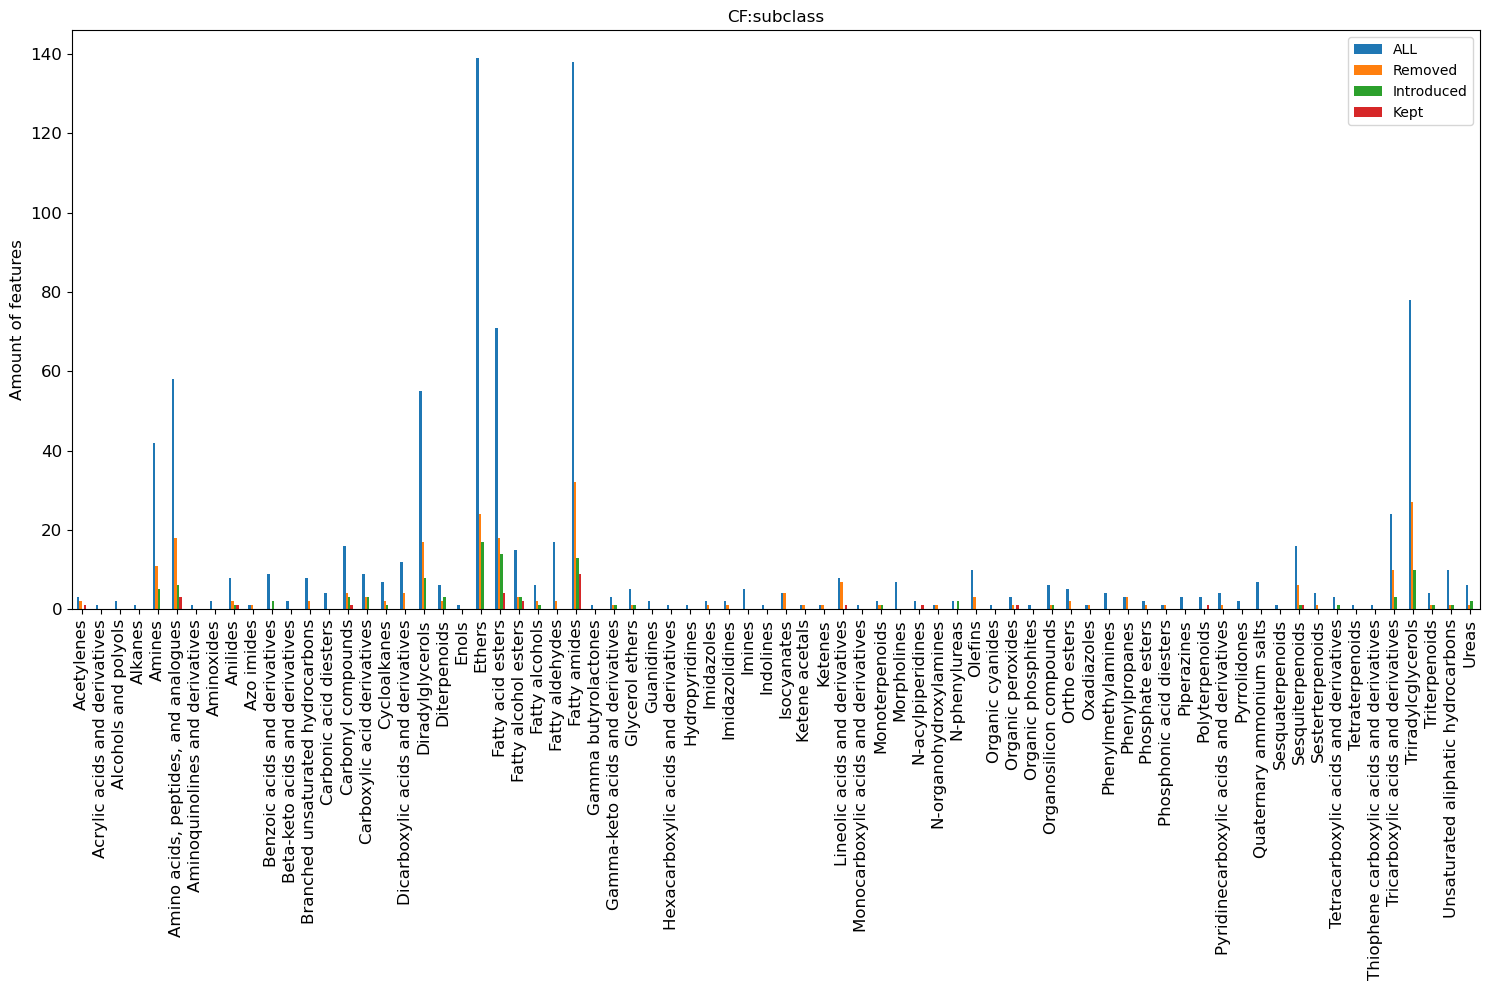

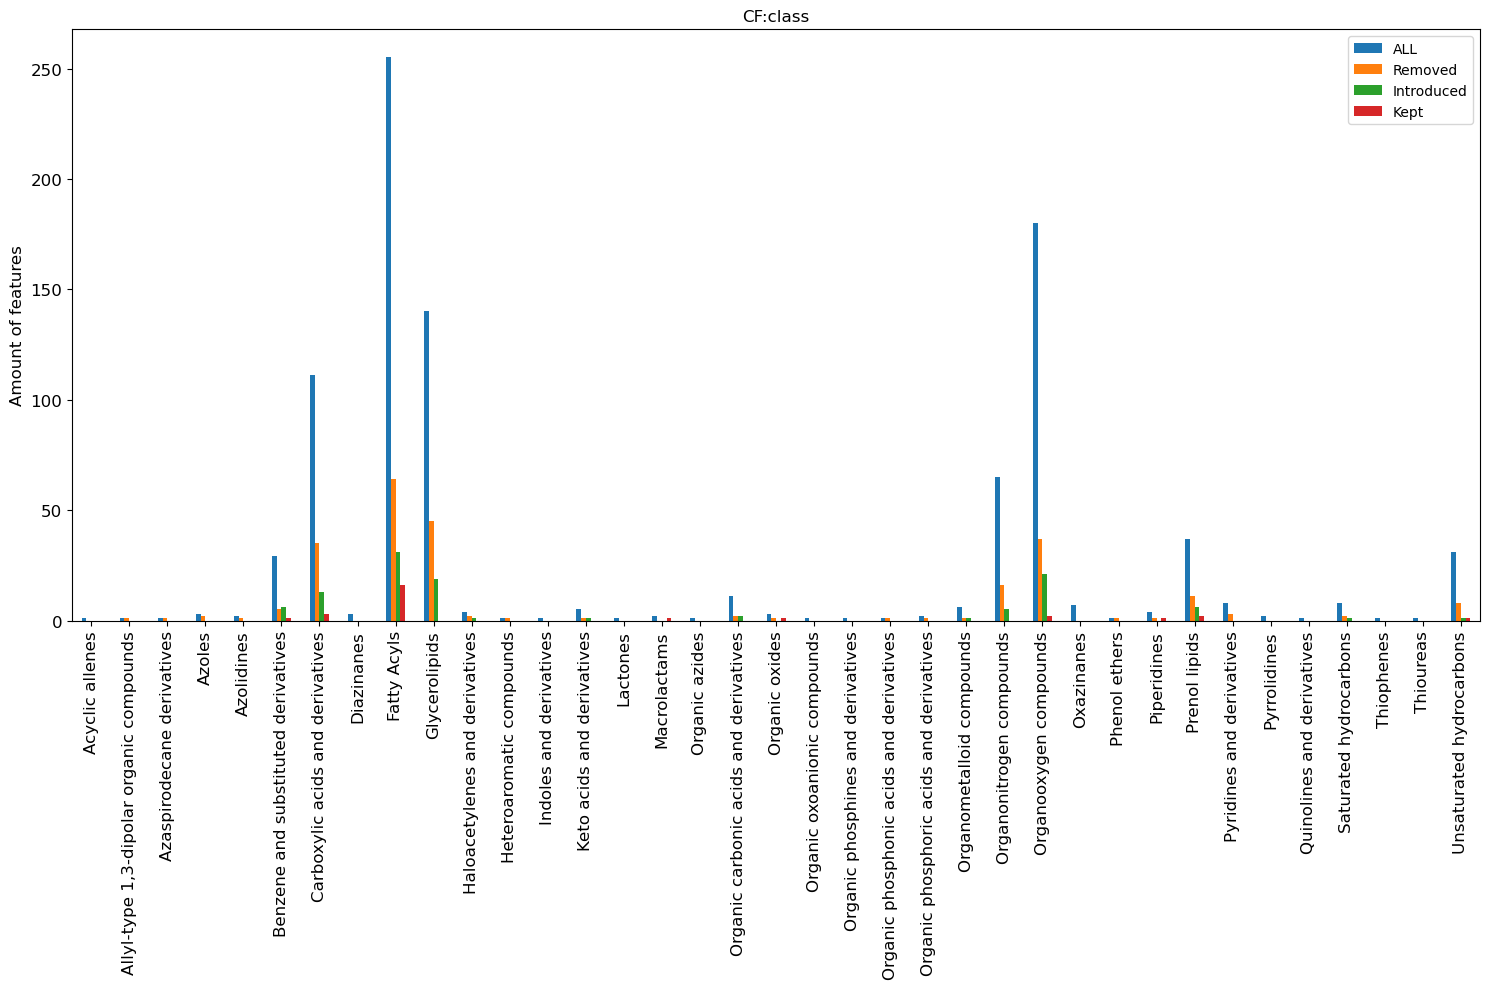

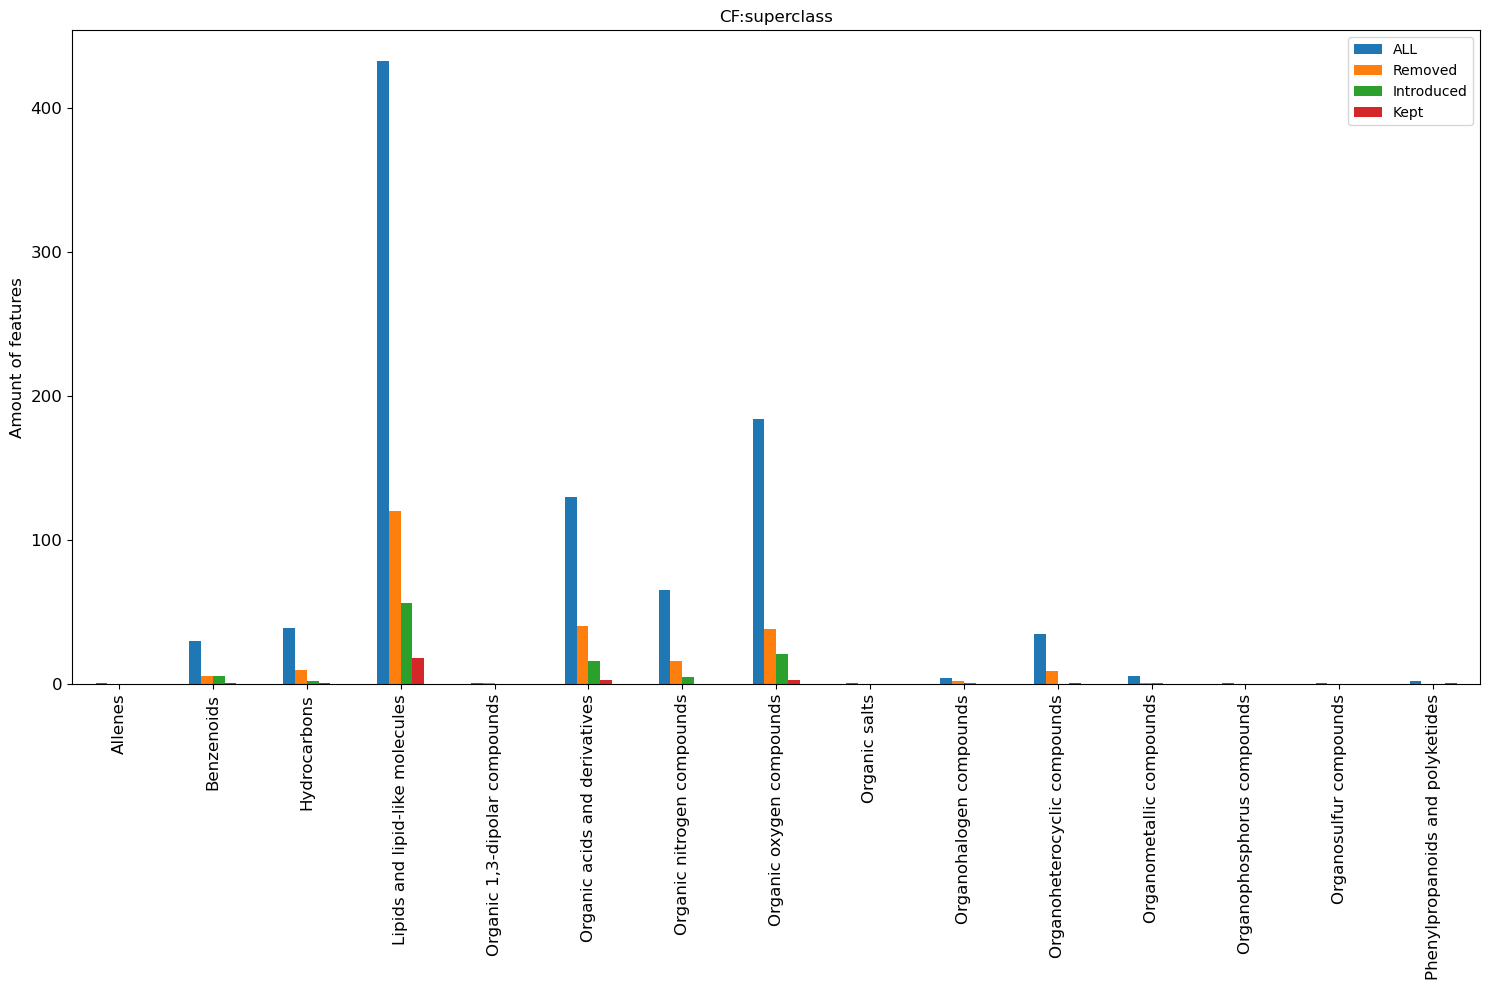

In [ ]:
for vis_col in ["CF:subclass", "CF:class", "CF:superclass"]:
    nw = onw[onw[vis_col] != "N/A"]
    RM = create_vc_df(nw,vis_col,col_to_filter="Removed_by_dec",normalize=False)
    IN = create_vc_df(nw,vis_col,col_to_filter="Introduced_by_dec",normalize=False)
    KP = create_vc_df(nw,vis_col,col_to_filter="Kept_by_dec",normalize=False)
    ALL = create_vc_df(nw,vis_col,normalize=False)
    df_joined = RM.join(IN,lsuffix="_Removed",rsuffix="_Introduced", how="outer")
    df_joined2 = ALL.join(KP,how="outer",lsuffix="_ALL",rsuffix="_Kept")
    df_joined = df_joined2.join(df_joined,how="outer").fillna(0)
    df_joined = df_joined.rename(columns=lambda x: x.split("_")[-1])
    # df_joined = df_joined.apply(lambda x: x*100)
    ax = df_joined[["ALL","Removed","Introduced","Kept"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Amount of features", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_counts_{vis_col}_intod_remov_kept.png"
    plt.tight_layout()
    plt.savefig(fig_name)

In [308]:
print(len([0,1]))

2


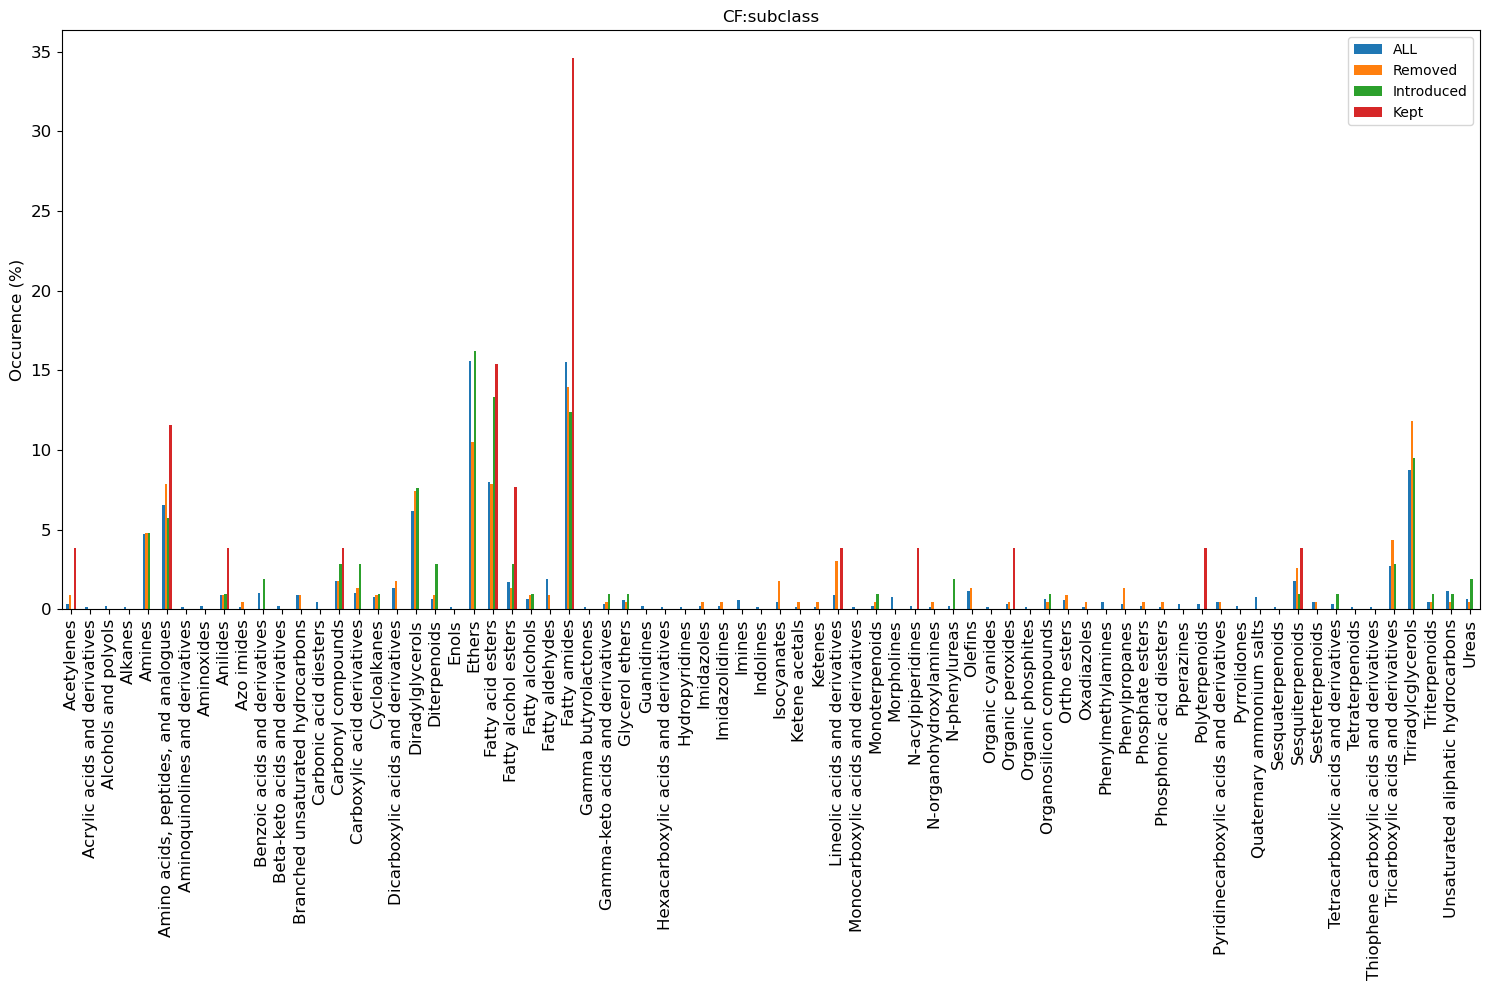

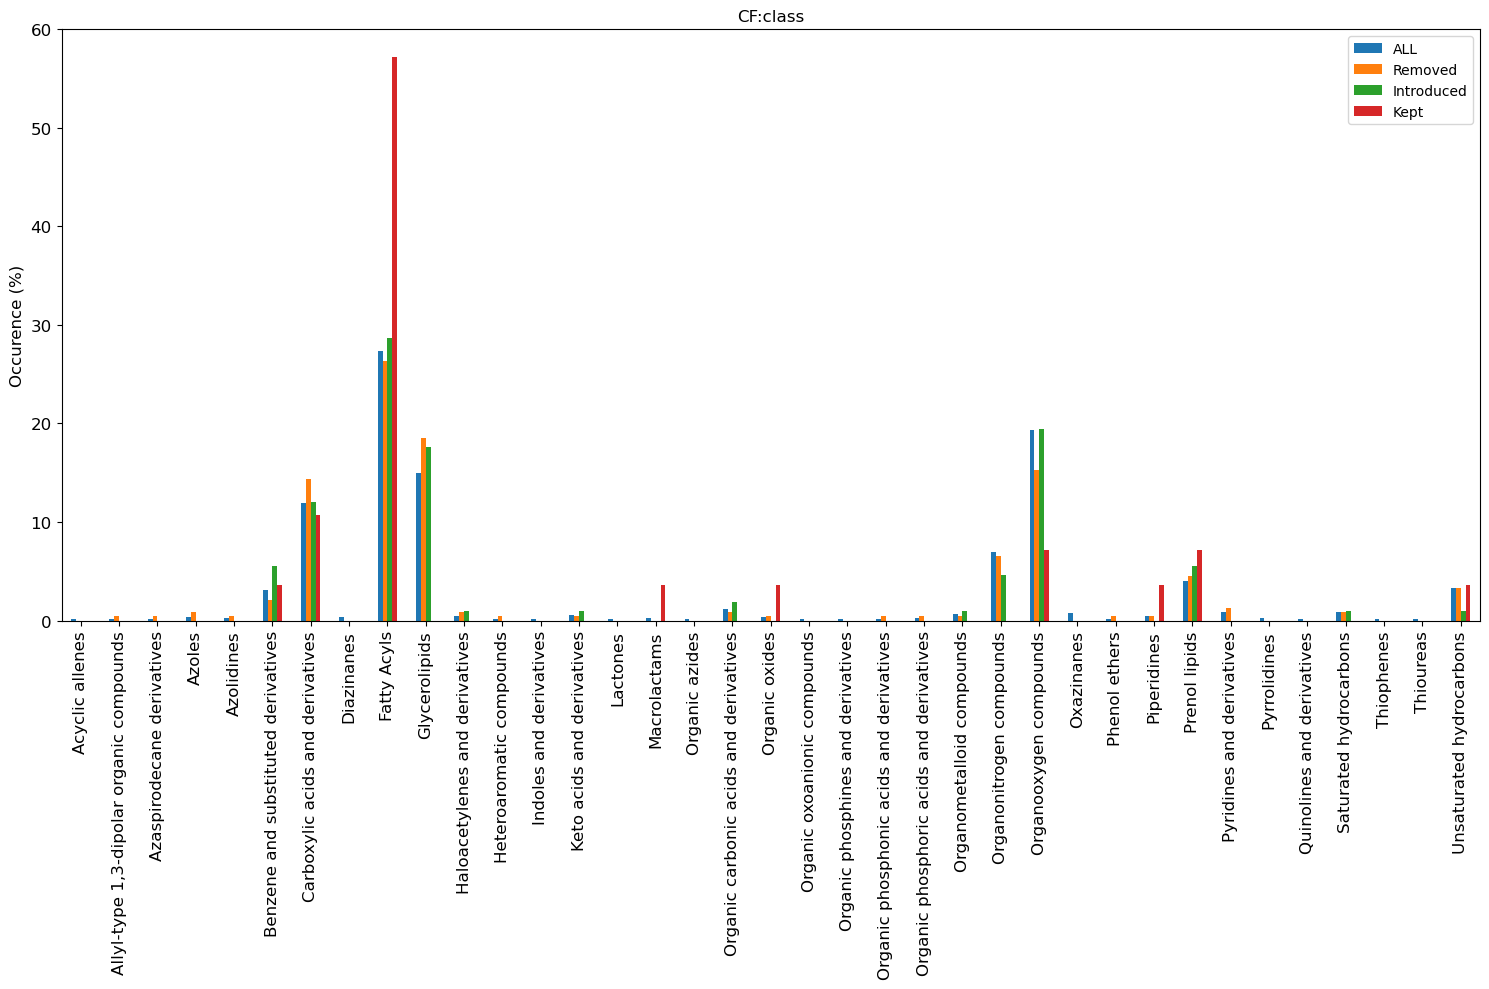

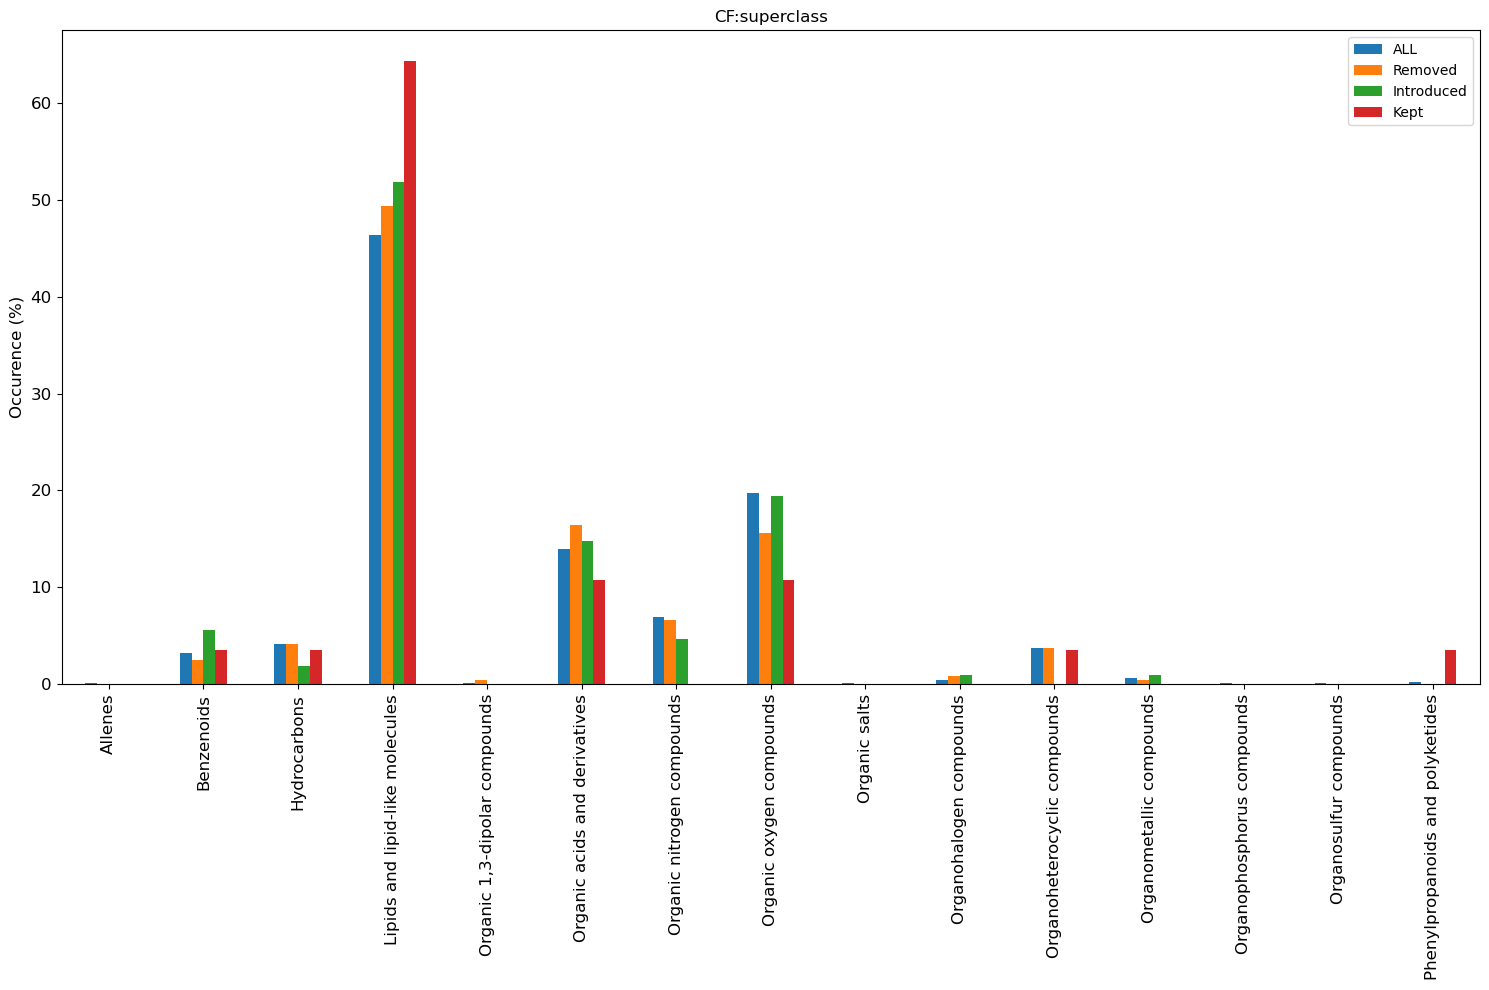

In [305]:
for vis_col in ["CF:subclass", "CF:class", "CF:superclass"]:
    nw = onw[onw[vis_col] != "N/A"]
    RM = create_vc_df(nw,vis_col,col_to_filter="Removed_by_dec",normalize=True)
    IN = create_vc_df(nw,vis_col,col_to_filter="Introduced_by_dec",normalize=True)
    KP = create_vc_df(nw,vis_col,col_to_filter="Kept_by_dec",normalize=True)
    ALL = create_vc_df(nw,vis_col,normalize=True)
    df_joined = RM.join(IN,lsuffix="_Removed",rsuffix="_Introduced", how="outer")
    df_joined2 = ALL.join(KP,how="outer",lsuffix="_ALL",rsuffix="_Kept")
    df_joined = df_joined2.join(df_joined,how="outer").fillna(0)
    df_joined = df_joined.rename(columns=lambda x: x.split("_")[-1])
    df_joined = df_joined.apply(lambda x: x*100)
    ax = df_joined[["ALL","Removed","Introduced","Kept"]].plot(kind='bar', title =vis_col, figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Occurence (%)", fontsize=12)
    fig_name=f"/lustre/BIF/nobackup/hendr218/Data/cf_only_occurence_{vis_col}_intod_remov_kept.png"
    plt.tight_layout()
    plt.savefig(fig_name)

In [ ]:
with open("/lustre/BIF/nobackup/hendr218/Data/with_pcdb_copy/first_test/first_test.pickle","rb") as file:
    wf = pickle.load(file)
df = wf.network_df
nw = df

from typing import Iterable
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import main
